In [1]:
# Importation of the libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import scipy.stats as stats
from sklearn.linear_model import Lasso, LassoCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.inspection import permutation_importance
from sklearn import svm

# 1. Data Preprocessing

## 1.1 Data importation

In [2]:
housing = pd.read_csv('AmesHousing.csv')
housing = housing.drop(columns=['Order', 'PID'])

print(housing.head())

   MS SubClass MS Zoning  Lot Frontage  Lot Area Street Alley Lot Shape  \
0           20        RL         141.0     31770   Pave   NaN       IR1   
1           20        RH          80.0     11622   Pave   NaN       Reg   
2           20        RL          81.0     14267   Pave   NaN       IR1   
3           20        RL          93.0     11160   Pave   NaN       Reg   
4           60        RL          74.0     13830   Pave   NaN       IR1   

  Land Contour Utilities Lot Config  ... Pool Area Pool QC  Fence  \
0          Lvl    AllPub     Corner  ...         0     NaN    NaN   
1          Lvl    AllPub     Inside  ...         0     NaN  MnPrv   
2          Lvl    AllPub     Corner  ...         0     NaN    NaN   
3          Lvl    AllPub     Corner  ...         0     NaN    NaN   
4          Lvl    AllPub     Inside  ...         0     NaN  MnPrv   

  Misc Feature Misc Val Mo Sold  Yr Sold  Sale Type  Sale Condition  SalePrice  
0          NaN        0       5     2010        WD   

In [3]:
# Number of records (rows)
num_records = housing.shape[0]

# Number of features (columns)
num_features = housing.shape[1]

print(f"Number of records: {num_records}")
print(f"Number of features: {num_features}")

# first five rows, quick check
housing.head(n = 5)

Number of records: 2930
Number of features: 80


MS SubClass MS Zoning  Lot Frontage  Lot Area Street Alley Lot Shape  \
0           20        RL         141.0     31770   Pave   NaN       IR1   
1           20        RH          80.0     11622   Pave   NaN       Reg   
2           20        RL          81.0     14267   Pave   NaN       IR1   
3           20        RL          93.0     11160   Pave   NaN       Reg   
4           60        RL          74.0     13830   Pave   NaN       IR1   

  Land Contour Utilities Lot Config  ... Pool Area Pool QC  Fence  \
0          Lvl    AllPub     Corner  ...         0     NaN    NaN   
1          Lvl    AllPub     Inside  ...         0     NaN  MnPrv   
2          Lvl    AllPub     Corner  ...         0     NaN    NaN   
3          Lvl    AllPub     Corner  ...         0     NaN    NaN   
4          Lvl    AllPub     Inside  ...         0     NaN  MnPrv   

  Misc Feature Misc Val Mo Sold  Yr Sold  Sale Type  Sale Condition  SalePrice  
0          NaN        0       5     2010        WD           Normal     215000  
1          NaN        0       6     2010        WD           Normal     105000  
2         Gar2    12500       6     2010        WD           Normal     172000  
3          NaN        0       4     2010        WD           Normal     244000  
4          NaN        0       3     2010        WD           Normal     189900  

[5 rows x 80 columns]

In [4]:
#Variable type
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 80 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MS SubClass      2930 non-null   int64  
 1   MS Zoning        2930 non-null   object 
 2   Lot Frontage     2440 non-null   float64
 3   Lot Area         2930 non-null   int64  
 4   Street           2930 non-null   object 
 5   Alley            198 non-null    object 
 6   Lot Shape        2930 non-null   object 
 7   Land Contour     2930 non-null   object 
 8   Utilities        2930 non-null   object 
 9   Lot Config       2930 non-null   object 
 10  Land Slope       2930 non-null   object 
 11  Neighborhood     2930 non-null   object 
 12  Condition 1      2930 non-null   object 
 13  Condition 2      2930 non-null   object 
 14  Bldg Type        2930 non-null   object 
 15  House Style      2930 non-null   object 
 16  Overall Qual     2930 non-null   int64  
 17  Overall Cond  

## 1.2 Duplicates

In [5]:
#Investigating for duplicate rows
duplicates=housing[housing.duplicated()]
print(duplicates)

Empty DataFrame
Columns: [MS SubClass, MS Zoning, Lot Frontage, Lot Area, Street, Alley, Lot Shape, Land Contour, Utilities, Lot Config, Land Slope, Neighborhood, Condition 1, Condition 2, Bldg Type, House Style, Overall Qual, Overall Cond, Year Built, Year Remod/Add, Roof Style, Roof Matl, Exterior 1st, Exterior 2nd, Mas Vnr Type, Mas Vnr Area, Exter Qual, Exter Cond, Foundation, Bsmt Qual, Bsmt Cond, Bsmt Exposure, BsmtFin Type 1, BsmtFin SF 1, BsmtFin Type 2, BsmtFin SF 2, Bsmt Unf SF, Total Bsmt SF, Heating, Heating QC, Central Air, Electrical, 1st Flr SF, 2nd Flr SF, Low Qual Fin SF, Gr Liv Area, Bsmt Full Bath, Bsmt Half Bath, Full Bath, Half Bath, Bedroom AbvGr, Kitchen AbvGr, Kitchen Qual, TotRms AbvGrd, Functional, Fireplaces, Fireplace Qu, Garage Type, Garage Yr Blt, Garage Finish, Garage Cars, Garage Area, Garage Qual, Garage Cond, Paved Drive, Wood Deck SF, Open Porch SF, Enclosed Porch, 3Ssn Porch, Screen Porch, Pool Area, Pool QC, Fence, Misc Feature, Misc Val, Mo Sold, Y

There are no duplicates in the data.

## 1.3 Missing Values

Now, we want to inspect and deal with the missing values.

In [6]:
housing.isna().sum().to_frame().T

MS SubClass  MS Zoning  Lot Frontage  Lot Area  Street  Alley  Lot Shape  \
0            0          0           490         0       0   2732          0   

   Land Contour  Utilities  Lot Config  ...  Pool Area  Pool QC  Fence  \
0             0          0           0  ...          0     2917   2358   

   Misc Feature  Misc Val  Mo Sold  Yr Sold  Sale Type  Sale Condition  \
0          2824         0        0        0          0               0   

   SalePrice  
0          0  

[1 rows x 80 columns]

In [7]:
# Now looking for percentage of missing values within each variable
percentage_missing = (housing.isnull().sum()/len(housing))*100

percentage_missing.to_frame().T

MS SubClass  MS Zoning  Lot Frontage  Lot Area  Street      Alley  \
0          0.0        0.0     16.723549       0.0     0.0  93.242321   

   Lot Shape  Land Contour  Utilities  Lot Config  ...  Pool Area    Pool QC  \
0        0.0           0.0        0.0         0.0  ...        0.0  99.556314   

       Fence  Misc Feature  Misc Val  Mo Sold  Yr Sold  Sale Type  \
0  80.477816     96.382253       0.0      0.0      0.0        0.0   

   Sale Condition  SalePrice  
0             0.0        0.0  

[1 rows x 80 columns]

Checks on some of the columns with NAs : 

In [8]:
print(housing[housing['Mas Vnr Type'].isna()][['Mas Vnr Area', 'Mas Vnr Type']])

#Here we see that when the Vnr Type is NA (ie meaning that there is no Veneer) thus the Veneer Area associated to it should be 0 

      Mas Vnr Area Mas Vnr Type
1              0.0          NaN
3              0.0          NaN
4              0.0          NaN
6              0.0          NaN
7              0.0          NaN
...            ...          ...
2924           0.0          NaN
2925           0.0          NaN
2926           0.0          NaN
2927           0.0          NaN
2928           0.0          NaN

[1775 rows x 2 columns]


In [9]:
housing[housing['Mas Vnr Area'].isna()][['Mas Vnr Area', 'Mas Vnr Type']]

#Also all values of the Area being NAs correspond to cases where the Veneer Type is "No Veneer"
#Consequently we can replace all the NAs of the veneer Area by 0

Mas Vnr Area Mas Vnr Type
55             NaN          NaN
484            NaN          NaN
517            NaN          NaN
538            NaN          NaN
867            NaN          NaN
1095           NaN          NaN
1119           NaN          NaN
1122           NaN          NaN
1127           NaN          NaN
1184           NaN          NaN
1454           NaN          NaN
1727           NaN          NaN
1751           NaN          NaN
1783           NaN          NaN
1799           NaN          NaN
1839           NaN          NaN
1840           NaN          NaN
2229           NaN          NaN
2260           NaN          NaN
2382           NaN          NaN
2392           NaN          NaN
2455           NaN          NaN
2823           NaN          NaN

In [10]:
housing[housing['BsmtFin Type 1'].isna()][['BsmtFin Type 1', 'BsmtFin SF 1']]

#when BsmtFin Type 1 is NaN, BestFin SF 1 is equal to 0 

BsmtFin Type 1  BsmtFin SF 1
83              NaN           0.0
154             NaN           0.0
206             NaN           0.0
243             NaN           0.0
273             NaN           0.0
...             ...           ...
2739            NaN           0.0
2744            NaN           0.0
2879            NaN           0.0
2892            NaN           0.0
2903            NaN           0.0

[80 rows x 2 columns]

In [11]:
housing[housing['BsmtFin SF 1'].isna()][['BsmtFin Type 1']]

BsmtFin Type 1
1341            NaN

In [12]:
housing[housing['BsmtFin SF 2'].isna()][['BsmtFin Type 2']]

#We can get rid of the house with index 1341

BsmtFin Type 2
1341            NaN

In [13]:
print(housing[housing['Bsmt Cond'].isna()][['Bsmt Cond', 'Bsmt Unf SF', 'Total Bsmt SF', 'Bsmt Full Bath', 'Bsmt Half Bath']])
#when Bsmt Cond is NA (ie. there is no basement), then all quantitative variables associated to it are 0

     Bsmt Cond  Bsmt Unf SF  Total Bsmt SF  Bsmt Full Bath  Bsmt Half Bath
83         NaN          0.0            0.0             0.0             0.0
154        NaN          0.0            0.0             0.0             0.0
206        NaN          0.0            0.0             0.0             0.0
243        NaN          0.0            0.0             0.0             0.0
273        NaN          0.0            0.0             0.0             0.0
...        ...          ...            ...             ...             ...
2739       NaN          0.0            0.0             0.0             0.0
2744       NaN          0.0            0.0             0.0             0.0
2879       NaN          0.0            0.0             0.0             0.0
2892       NaN          0.0            0.0             0.0             0.0
2903       NaN          0.0            0.0             0.0             0.0

[80 rows x 5 columns]


In [14]:
print(housing[housing['Electrical'].isna()]['Electrical'])

#We can drop the individual 1577 since it is the only NA that we get from the Electrical variable

1577    NaN
Name: Electrical, dtype: object


In [15]:
print(housing[housing['Garage Type'].isna()][['Garage Type', 'Garage Yr Blt', 'Garage Cars', 'Garage Area']])
#when Garage Type is NA (ie. there is no garage in the house), then all quantitative variables associated to it are 0

     Garage Type  Garage Yr Blt  Garage Cars  Garage Area
27           NaN            NaN          0.0          0.0
119          NaN            NaN          0.0          0.0
125          NaN            NaN          0.0          0.0
129          NaN            NaN          0.0          0.0
130          NaN            NaN          0.0          0.0
...          ...            ...          ...          ...
2913         NaN            NaN          0.0          0.0
2916         NaN            NaN          0.0          0.0
2918         NaN            NaN          0.0          0.0
2919         NaN            NaN          0.0          0.0
2927         NaN            NaN          0.0          0.0

[157 rows x 4 columns]


In [16]:
# Alley: replace NaN with 'No alley'
housing['Alley'] = housing['Alley'].fillna('No alley')

# Mas Vnr Type: replace NaN with 'No veneer'
housing['Mas Vnr Type'] = housing['Mas Vnr Type'].fillna('No veneer')

# Replace NaN of several columns with 'No Basement'
cols_to_replace = ['Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2']
housing[cols_to_replace] = housing[cols_to_replace].fillna('No Basement')

# Replace NaN of several columns with 0
cols_to_replace = ['Mas Vnr Area', 'Bsmt Unf SF', 'Total Bsmt SF', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Garage Cars', 'Garage Area']
housing[cols_to_replace] = housing[cols_to_replace].fillna(0)

# Fireplace Qu: replace NaN with 'No Fireplace'
housing['Fireplace Qu'] = housing['Fireplace Qu'].fillna('No Fireplace')

# Replace NaN of several columns with 'No Garage'
cols_to_replace = ['Garage Type', 'Garage Yr Blt', 'Garage Finish', 'Garage Qual', 'Garage Cond']
housing[cols_to_replace] = housing[cols_to_replace].fillna('No Garage')

# Pool Qual: replace NaN with 'No Pool'
housing['Pool QC'] = housing['Pool QC'].fillna('No Pool')

# Fence: replace NaN with 'No Fence'
housing['Fence'] = housing['Fence'].fillna('No Fence')

# Misc Feature: replace NaN with 'No other feature'
housing['Misc Feature'] = housing['Misc Feature'].fillna('No other feature')

# Delete the row with index 1577 and 1341
housing = housing.drop(housing.index[[1341, 1577]])


In [17]:
#get the last variables with missing values
last_missing = (housing.isnull().sum()/len(housing))*100

# Filter out columns with no missing values
last_missing = last_missing[last_missing > 0]
print(last_missing)

Lot Frontage    16.734973
dtype: float64


To deal with the only variable still containing missing values, we decide to implement a KNN imputation (choosing k = 5 neighbours).

In [18]:
from sklearn.impute import KNNImputer

# Initialize the KNNImputer with 5 neighbors
imputer = KNNImputer(n_neighbors=5)

housing[['Lot Frontage']] = imputer.fit_transform(housing[['Lot Frontage']])

# Show the updated DataFrame
print(housing)

      MS SubClass MS Zoning  Lot Frontage  Lot Area Street     Alley  \
0              20        RL    141.000000     31770   Pave  No alley   
1              20        RH     80.000000     11622   Pave  No alley   
2              20        RL     81.000000     14267   Pave  No alley   
3              20        RL     93.000000     11160   Pave  No alley   
4              60        RL     74.000000     13830   Pave  No alley   
...           ...       ...           ...       ...    ...       ...   
2925           80        RL     37.000000      7937   Pave  No alley   
2926           20        RL     69.210829      8885   Pave  No alley   
2927           85        RL     62.000000     10441   Pave  No alley   
2928           20        RL     77.000000     10010   Pave  No alley   
2929           60        RL     74.000000      9627   Pave  No alley   

     Lot Shape Land Contour Utilities Lot Config  ... Pool Area  Pool QC  \
0          IR1          Lvl    AllPub     Corner  ...      

In [19]:
print(housing[housing['Lot Frontage'].isna()]) 

Empty DataFrame
Columns: [MS SubClass, MS Zoning, Lot Frontage, Lot Area, Street, Alley, Lot Shape, Land Contour, Utilities, Lot Config, Land Slope, Neighborhood, Condition 1, Condition 2, Bldg Type, House Style, Overall Qual, Overall Cond, Year Built, Year Remod/Add, Roof Style, Roof Matl, Exterior 1st, Exterior 2nd, Mas Vnr Type, Mas Vnr Area, Exter Qual, Exter Cond, Foundation, Bsmt Qual, Bsmt Cond, Bsmt Exposure, BsmtFin Type 1, BsmtFin SF 1, BsmtFin Type 2, BsmtFin SF 2, Bsmt Unf SF, Total Bsmt SF, Heating, Heating QC, Central Air, Electrical, 1st Flr SF, 2nd Flr SF, Low Qual Fin SF, Gr Liv Area, Bsmt Full Bath, Bsmt Half Bath, Full Bath, Half Bath, Bedroom AbvGr, Kitchen AbvGr, Kitchen Qual, TotRms AbvGrd, Functional, Fireplaces, Fireplace Qu, Garage Type, Garage Yr Blt, Garage Finish, Garage Cars, Garage Area, Garage Qual, Garage Cond, Paved Drive, Wood Deck SF, Open Porch SF, Enclosed Porch, 3Ssn Porch, Screen Porch, Pool Area, Pool QC, Fence, Misc Feature, Misc Val, Mo Sold, Y

Now we have dealt with all missing values we spotted. 

## 1.4 Outliers

Now, we want to detect if there are outliers in the database. To do so, we first draw some boxplots on the numerical columns.

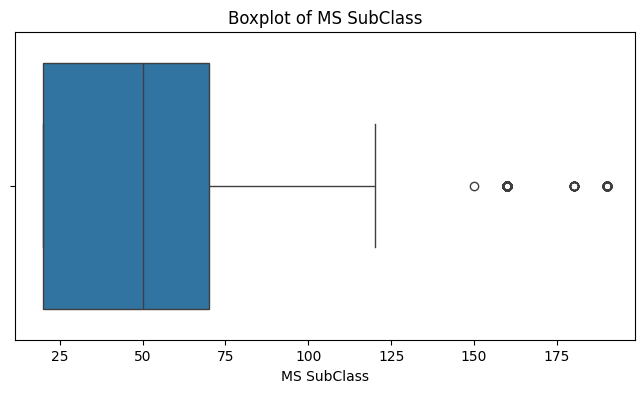

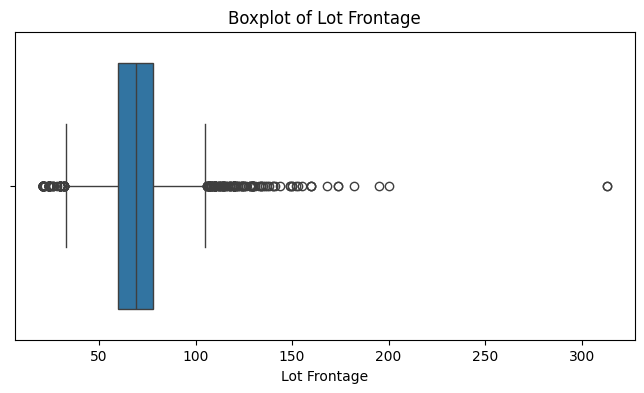

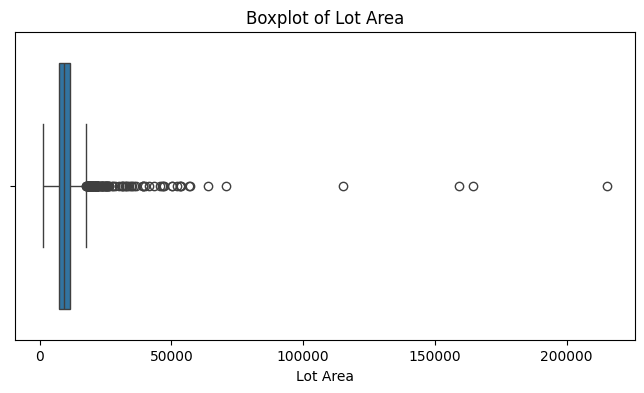

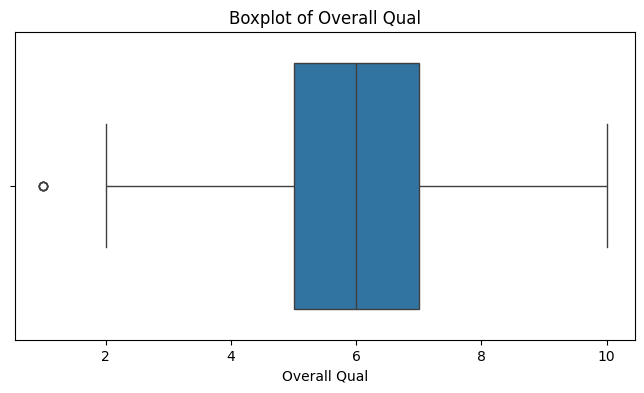

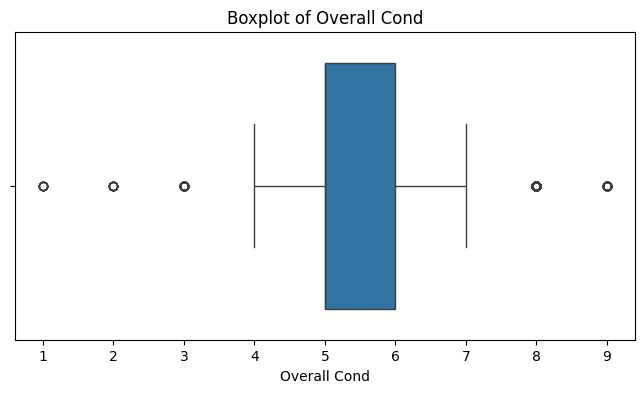

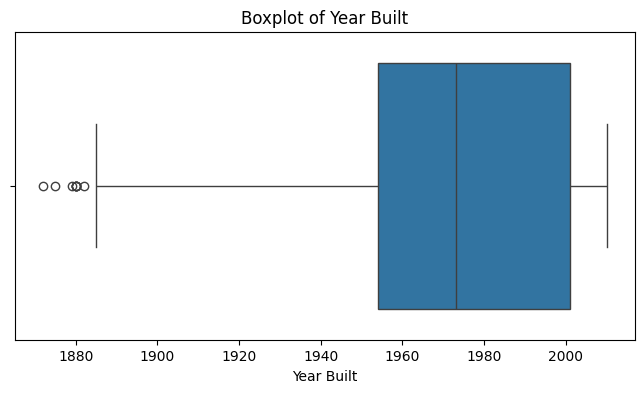

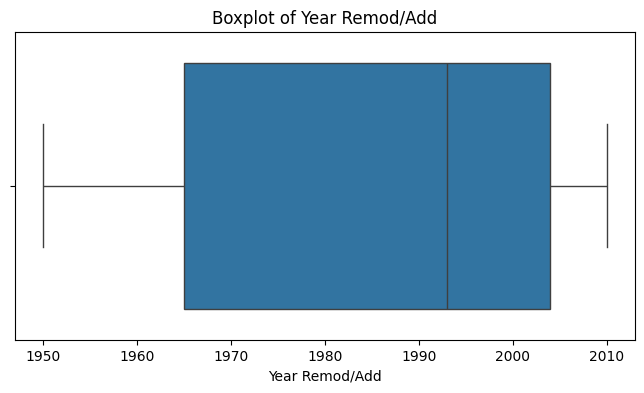

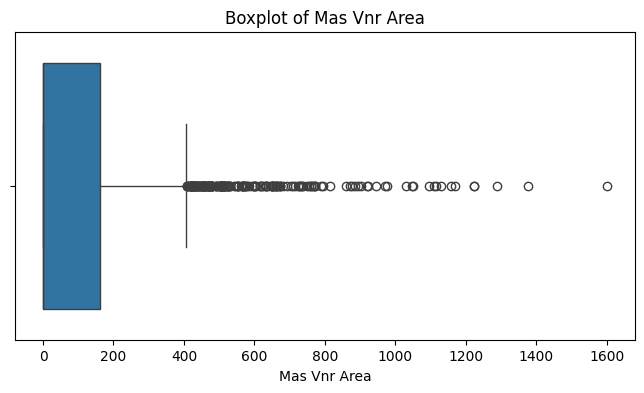

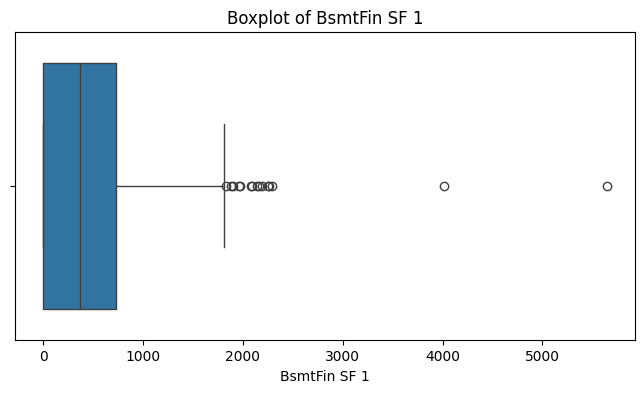

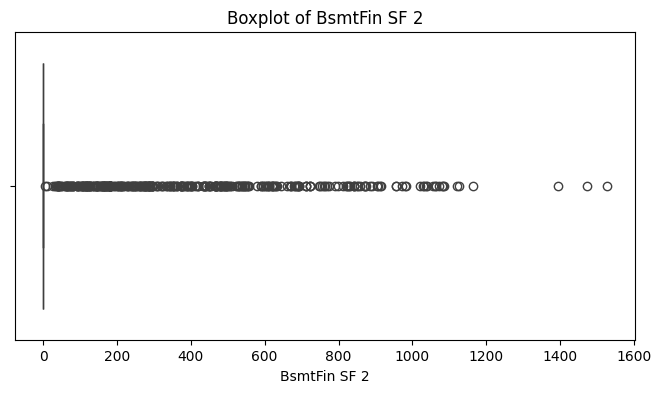

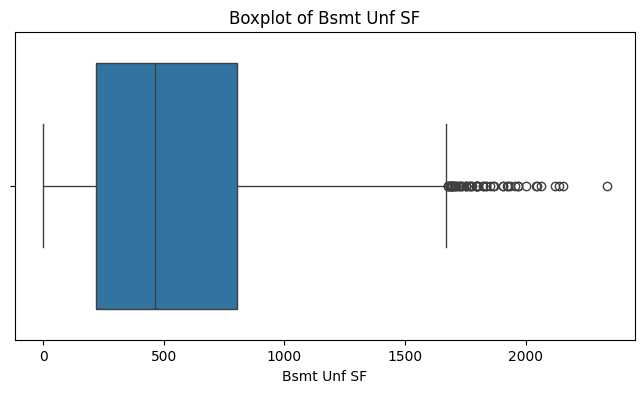

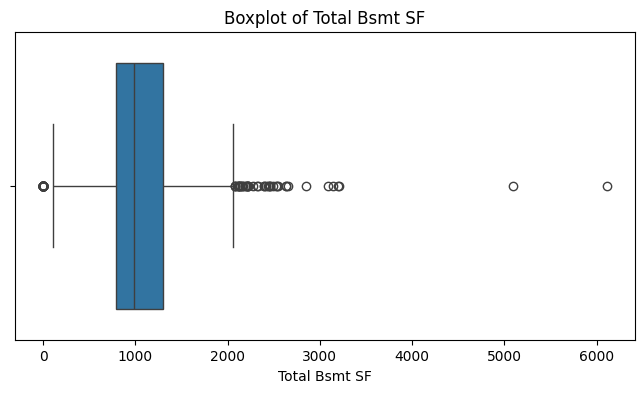

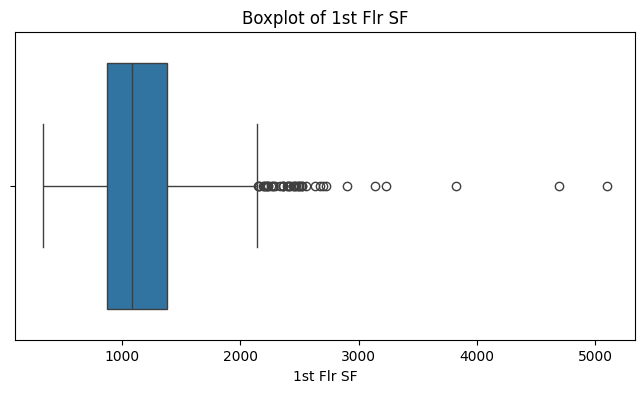

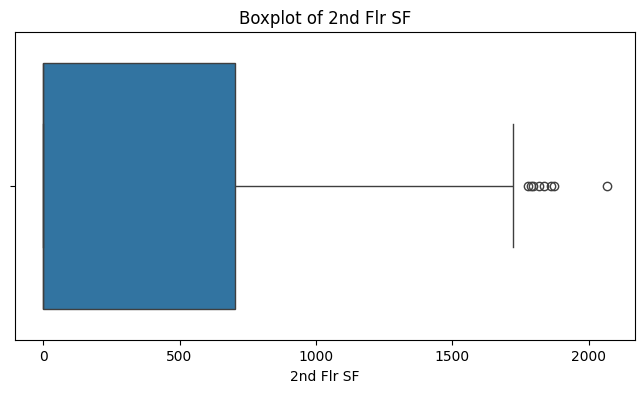

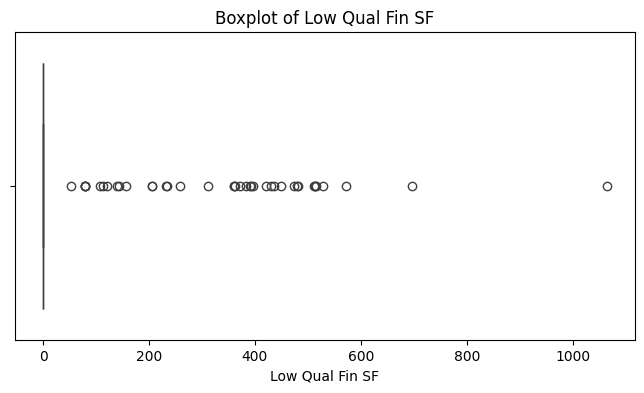

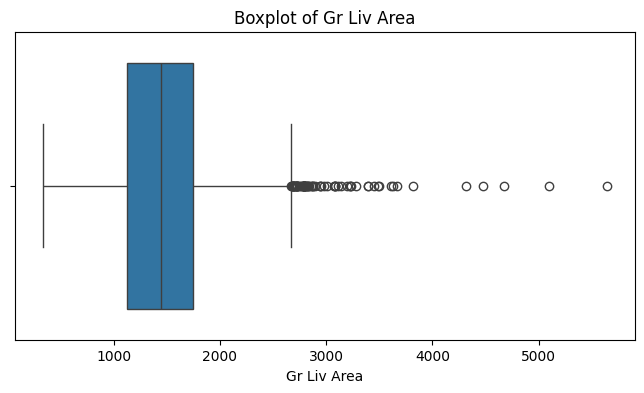

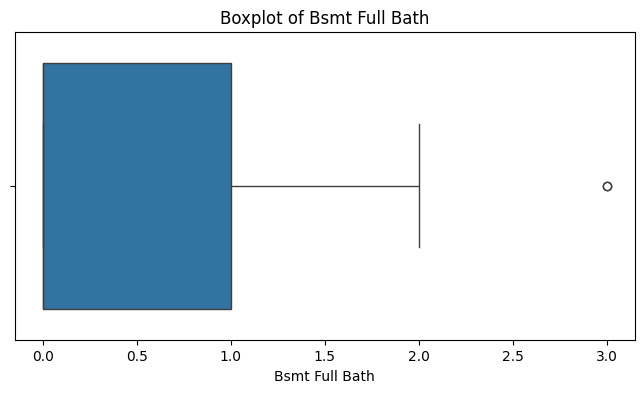

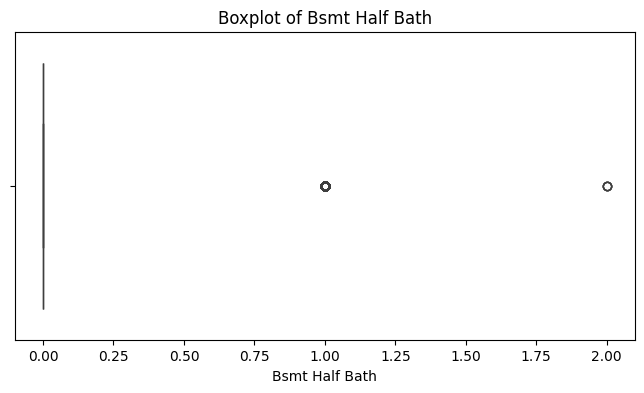

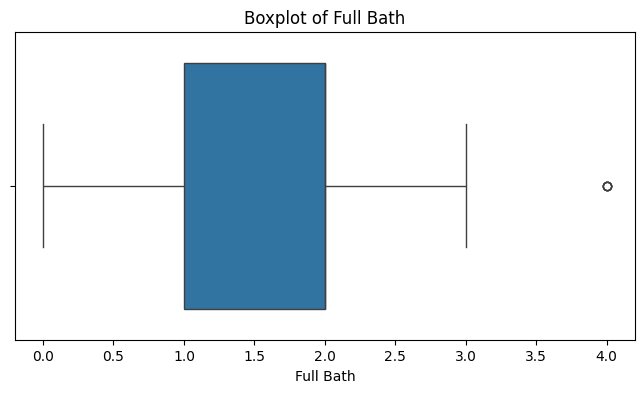

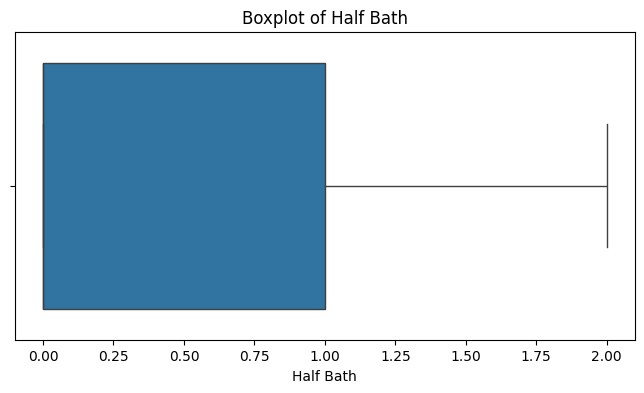

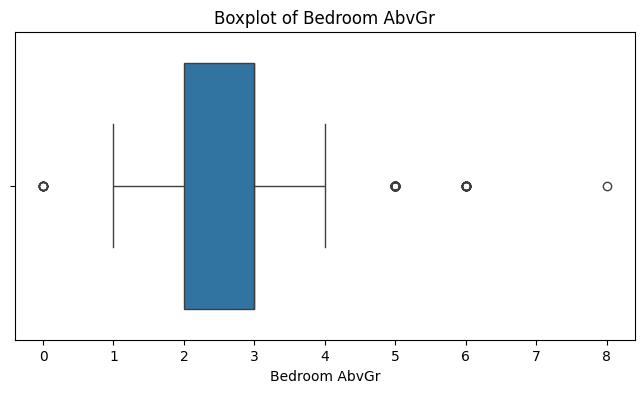

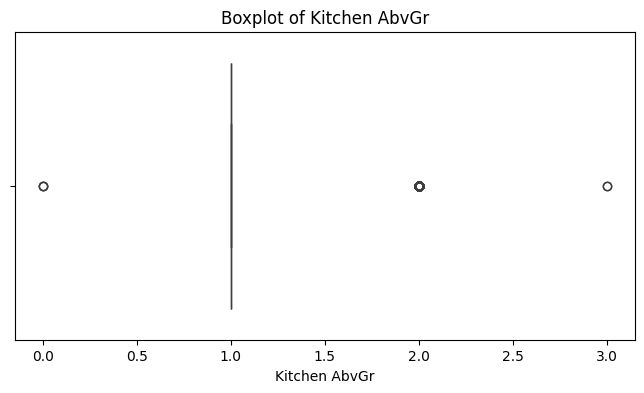

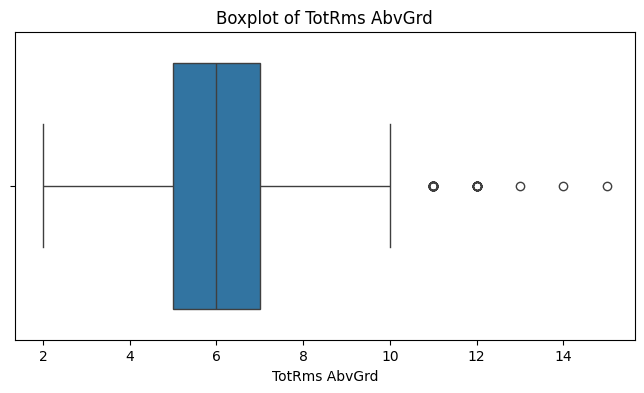

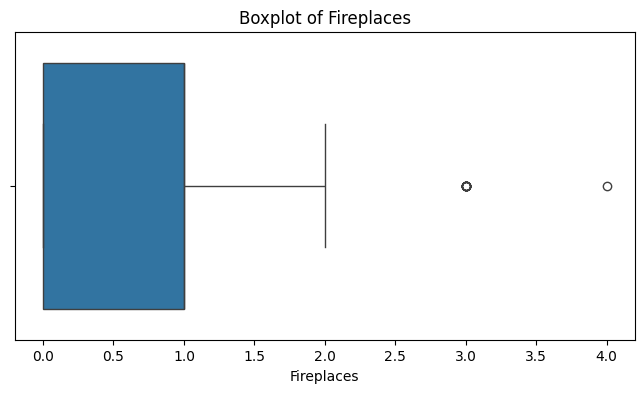

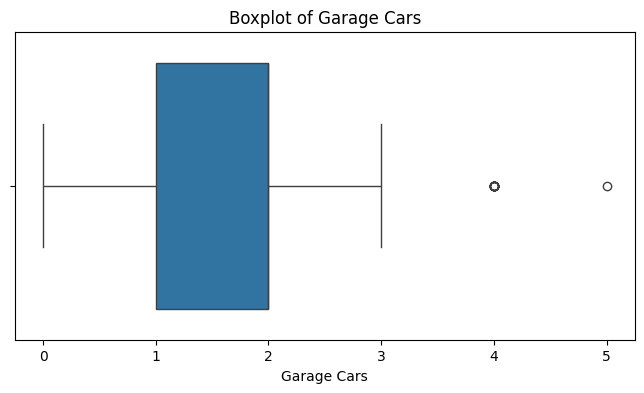

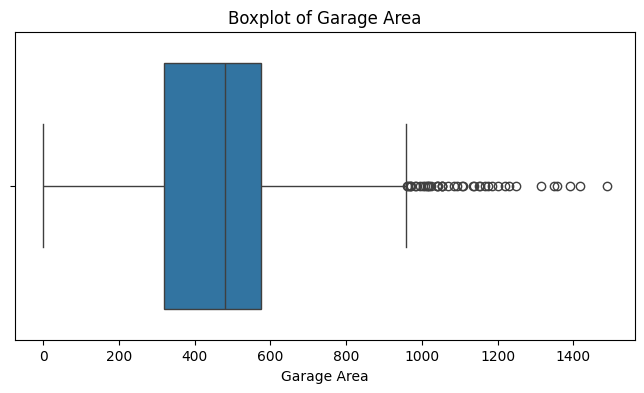

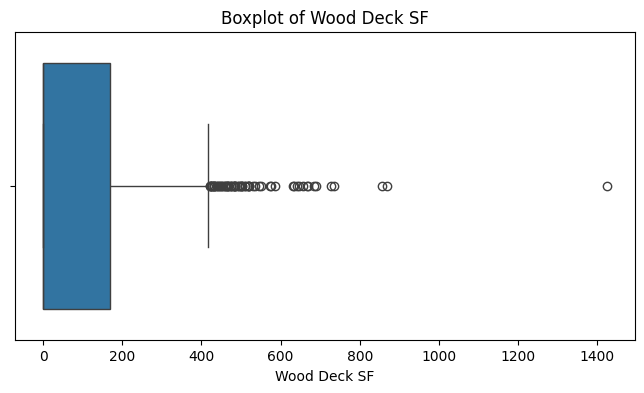

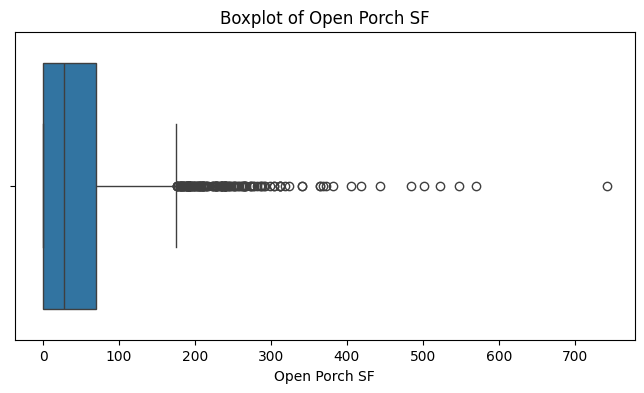

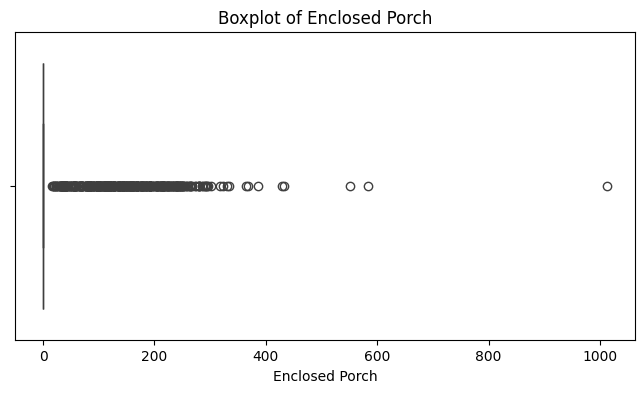

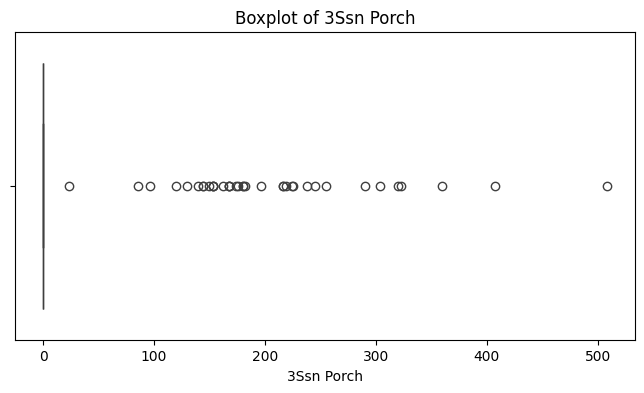

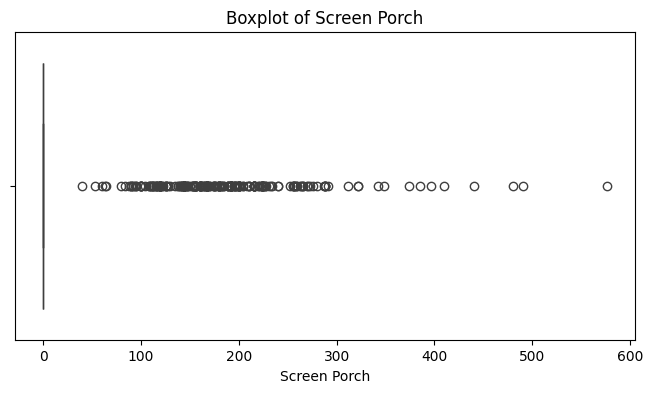

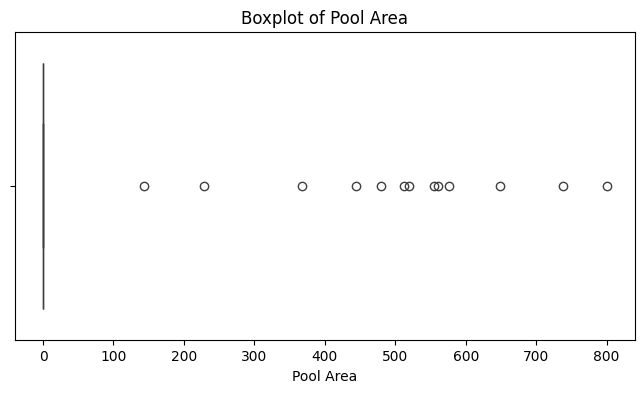

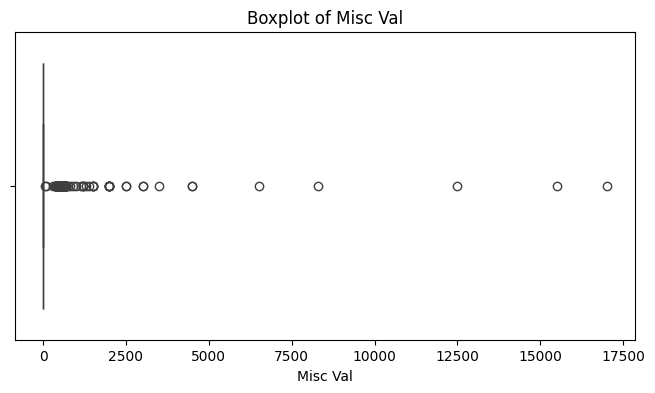

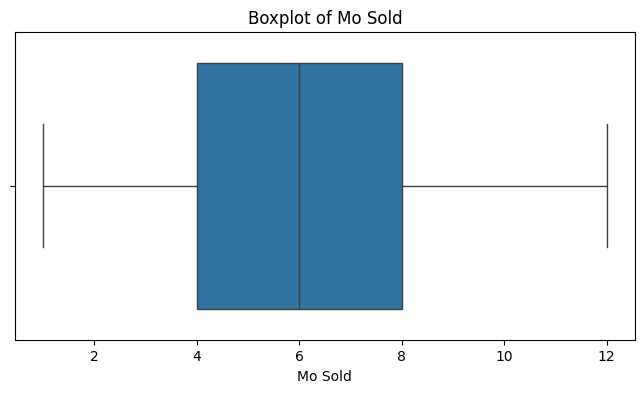

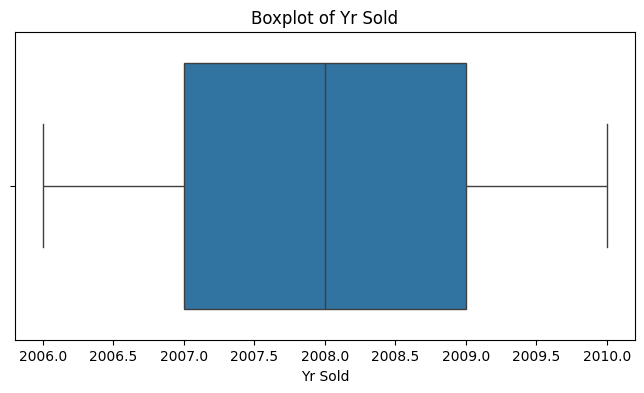

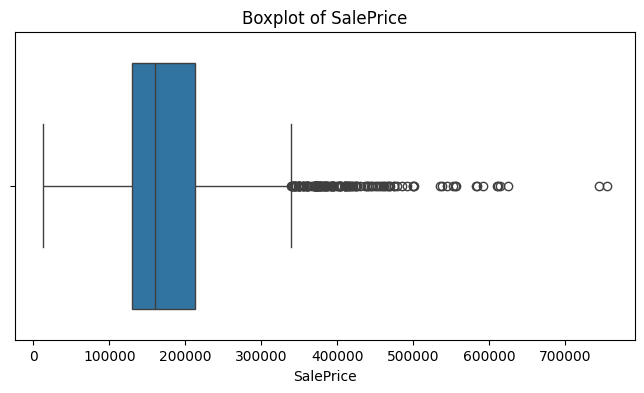

In [20]:
numeric_columns = housing.select_dtypes(include=['number']).columns  # Select only numeric columns

# Loop through each column and create a boxplot
for col in numeric_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=housing[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


We decide to winsorize the columns where there are outliers

In [21]:
columns_to_winsor = [
    'Lot Frontage',
    'Lot Area',
    'Mas Vnr Area',
    'Bsmt Unf SF',
    'Total Bsmt SF',
    '1st Flr SF',
    '2nd Flr SF',
    'Gr Liv Area',
    'Garage Area',
    'Wood Deck SF',
    'Open Porch SF',
    'SalePrice'
]

housing_winsor = housing[columns_to_winsor]

# Compute the 97.5th percentile for numerical variables
percentiles_97 = housing_winsor.quantile(0.975)

print(percentiles_97)

Lot Frontage        118.000
Lot Area          21519.000
Mas Vnr Area        600.000
Bsmt Unf SF        1624.475
Total Bsmt SF      1944.900
1st Flr SF         2026.600
2nd Flr SF         1280.300
Gr Liv Area        2672.125
Garage Area         906.650
Wood Deck SF        408.650
Open Porch SF       234.000
SalePrice        389475.000
Name: 0.975, dtype: float64


In [22]:
# Define thresholds for Winsorizing
thresholds = {
    'Lot Frontage': 100,
    'Lot Area': 20000,
    'Mas Vnr Area': 601.05,
    'Bsmt Unf SF':1624.4,
    'Total Bsmt SF':1944.6, 
    '1st Flr SF': 2026.2,
    '2nd Flr SF': 1280.1,
    'Gr Liv Area': 2671.875,
    'Garage Area': 906.6,
    'Wood Deck SF': 408.55,
    'Open Porch SF': 234.0,
    'SalePrice': 389325
}

# Winsorize the columns
for column, cap in thresholds.items():
    if column in housing.columns:
        housing[column] = housing[column].clip(upper=cap)

# Check the result
print(housing.head())

   MS SubClass MS Zoning  Lot Frontage  Lot Area Street     Alley Lot Shape  \
0           20        RL         100.0     20000   Pave  No alley       IR1   
1           20        RH          80.0     11622   Pave  No alley       Reg   
2           20        RL          81.0     14267   Pave  No alley       IR1   
3           20        RL          93.0     11160   Pave  No alley       Reg   
4           60        RL          74.0     13830   Pave  No alley       IR1   

  Land Contour Utilities Lot Config  ... Pool Area  Pool QC     Fence  \
0          Lvl    AllPub     Corner  ...         0  No Pool  No Fence   
1          Lvl    AllPub     Inside  ...         0  No Pool     MnPrv   
2          Lvl    AllPub     Corner  ...         0  No Pool  No Fence   
3          Lvl    AllPub     Corner  ...         0  No Pool  No Fence   
4          Lvl    AllPub     Inside  ...         0  No Pool     MnPrv   

       Misc Feature Misc Val Mo Sold  Yr Sold  Sale Type  Sale Condition  \
0  No othe

## 1.5 Scaling

Finally, we inspect the statistical summary of the dataset.

In [23]:
#Statiscal Summary:
housing.describe()

MS SubClass  Lot Frontage      Lot Area  Overall Qual  Overall Cond  \
count  2928.000000   2928.000000   2928.000000   2928.000000   2928.000000   
mean     57.392418     67.947167   9643.299522      6.095970      5.562842   
std      42.644942     17.408850   3826.397557      1.410831      1.111550   
min      20.000000     21.000000   1300.000000      1.000000      1.000000   
25%      20.000000     60.000000   7440.750000      5.000000      5.000000   
50%      50.000000     69.210829   9436.500000      6.000000      5.000000   
75%      70.000000     78.000000  11556.000000      7.000000      6.000000   
max     190.000000    100.000000  20000.000000     10.000000      9.000000   

        Year Built  Year Remod/Add  Mas Vnr Area  BsmtFin SF 1  BsmtFin SF 2  \
count  2928.000000     2928.000000   2928.000000   2928.000000   2928.000000   
mean   1971.353142     1984.270492     95.737244    442.780738     49.739413   
std      30.245284       20.853564    155.457722    455.595179    169.194874   
min    1872.000000     1950.000000      0.000000      0.000000      0.000000   
25%    1954.000000     1965.000000      0.000000      0.000000      0.000000   
50%    1973.000000     1993.000000      0.000000    370.500000      0.000000   
75%    2001.000000     2004.000000    163.000000    734.250000      0.000000   
max    2010.000000     2010.000000    601.050000   5644.000000   1526.000000   

       ...  Wood Deck SF  Open Porch SF  Enclosed Porch   3Ssn Porch  \
count  ...   2928.000000    2928.000000     2928.000000  2928.000000   
mean   ...     90.840745      45.799522       23.027322     2.594262   
std    ...    115.035098      59.593921       64.158147    25.149828   
min    ...      0.000000       0.000000        0.000000     0.000000   
25%    ...      0.000000       0.000000        0.000000     0.000000   
50%    ...      0.000000      27.000000        0.000000     0.000000   
75%    ...    168.000000      70.000000        0.000000     0.000000   
max    ...    408.550000     234.000000     1012.000000   508.000000   

       Screen Porch    Pool Area      Misc Val      Mo Sold      Yr Sold  \
count   2928.000000  2928.000000   2928.000000  2928.000000  2928.000000   
mean      16.012978     2.244877     50.669740     6.217213  2007.790301   
std       56.104969    35.609292    566.536198     2.715017     1.317051   
min        0.000000     0.000000      0.000000     1.000000  2006.000000   
25%        0.000000     0.000000      0.000000     4.000000  2007.000000   
50%        0.000000     0.000000      0.000000     6.000000  2008.000000   
75%        0.000000     0.000000      0.000000     8.000000  2009.000000   
max      576.000000   800.000000  17000.000000    12.000000  2010.000000   

           SalePrice  
count    2928.000000  
mean   178911.494194  
std     72600.248169  
min     12789.000000  
25%    129500.000000  
50%    160000.000000  
75%    213500.000000  
max    389325.000000  

[8 rows x 36 columns]

We can see that all the variables are not on the same scale, so we may need to a scale the dataset for some of our models that we will build.

# 2. Exploratory Data Analysis

## 2.1 About the Sale Price: Variable of interest

<Axes: xlabel='SalePrice', ylabel='Count'>

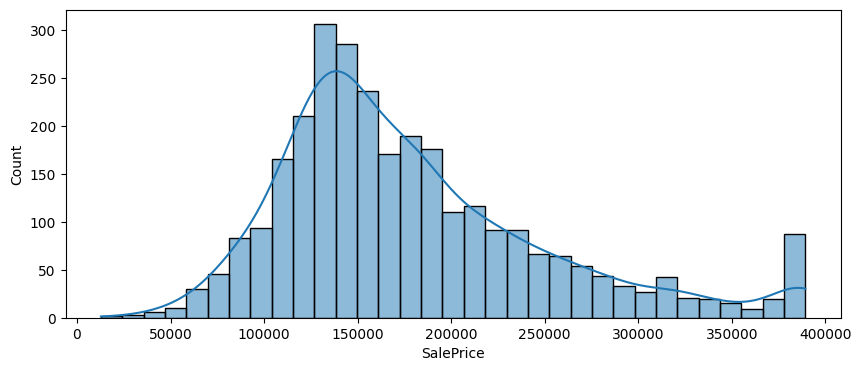

In [24]:
# Sale Price histogram
plt.figure(figsize=(10, 4))
sns.histplot(housing['SalePrice'], kde=True)

The distributions is bell shaped but it is right skewed. The high count around 400000 is due to outliers that we have winsorized.

## 2.2 About the Area related Variables

In [25]:
# List of columns to keep in the new DataFrame
columns_to_keep = [
    'Lot Area', 'Mas Vnr Area', 'Total Bsmt SF', '1st Flr SF', 
    '2nd Flr SF', 'Garage Area', 'Open Porch SF', 'Wood Deck SF', 'SalePrice'
]

# Creating the subset
housing_area = housing[columns_to_keep]


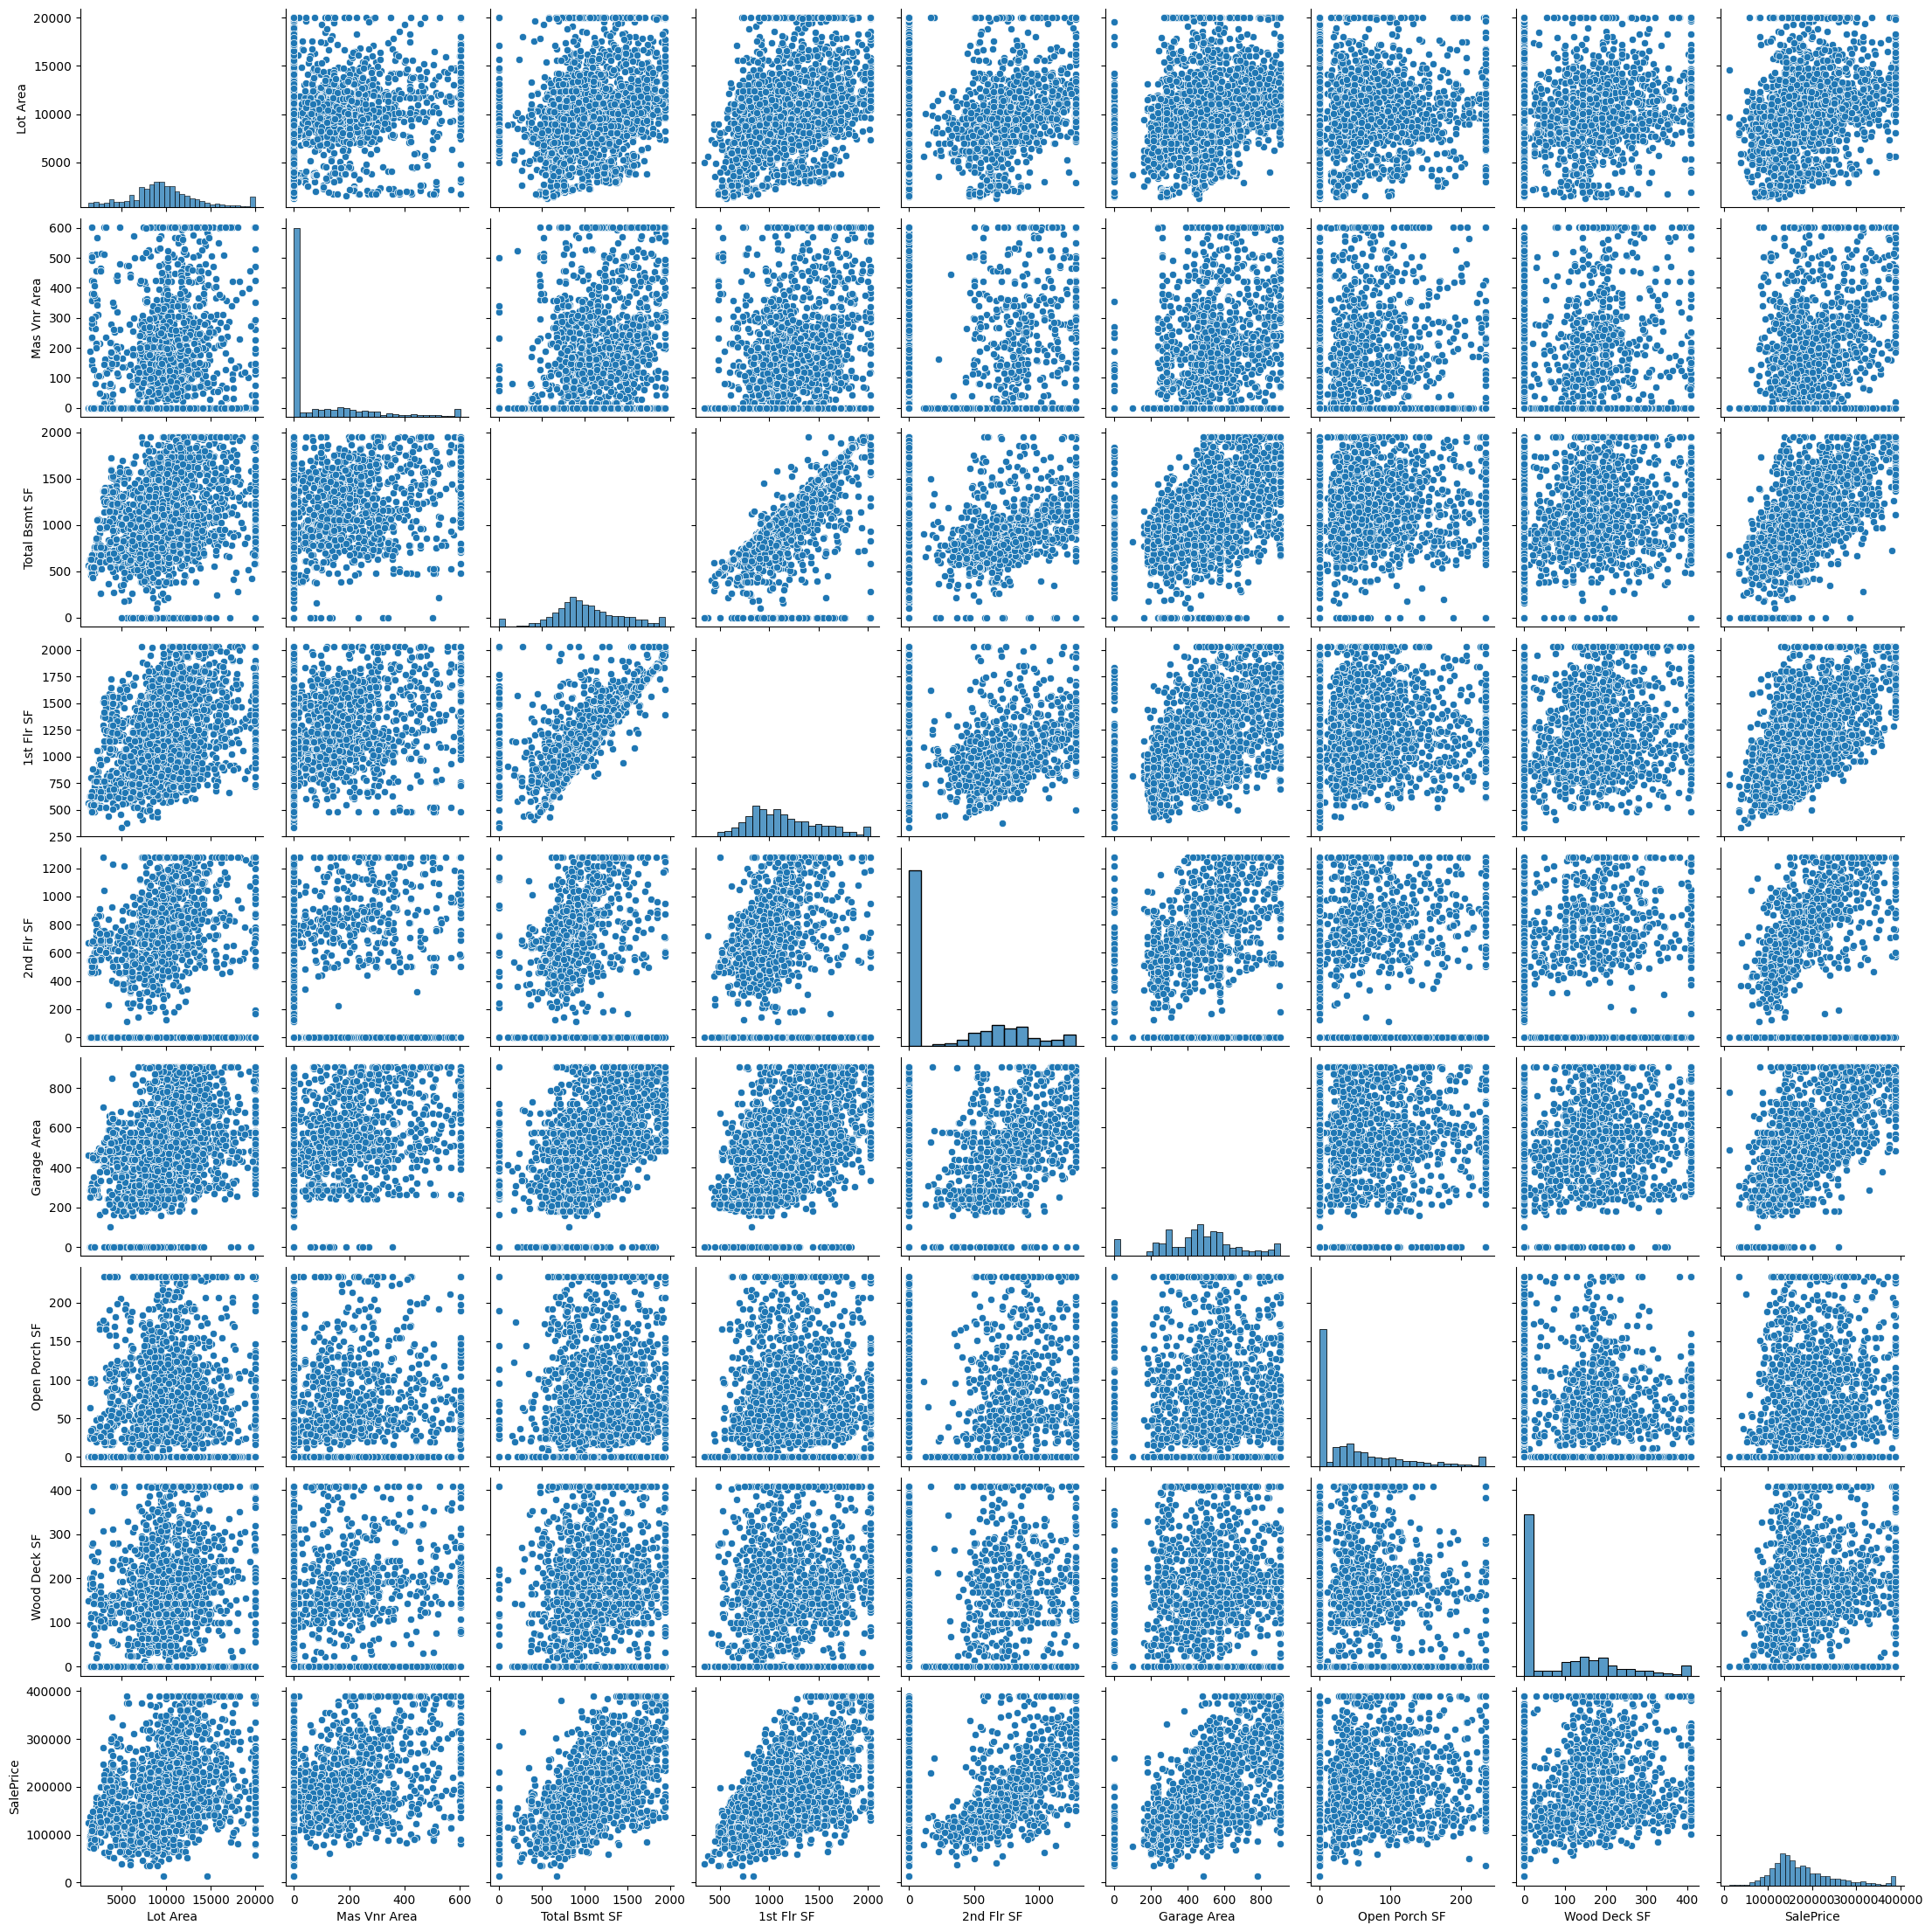

In [26]:
sns.pairplot(housing_area)

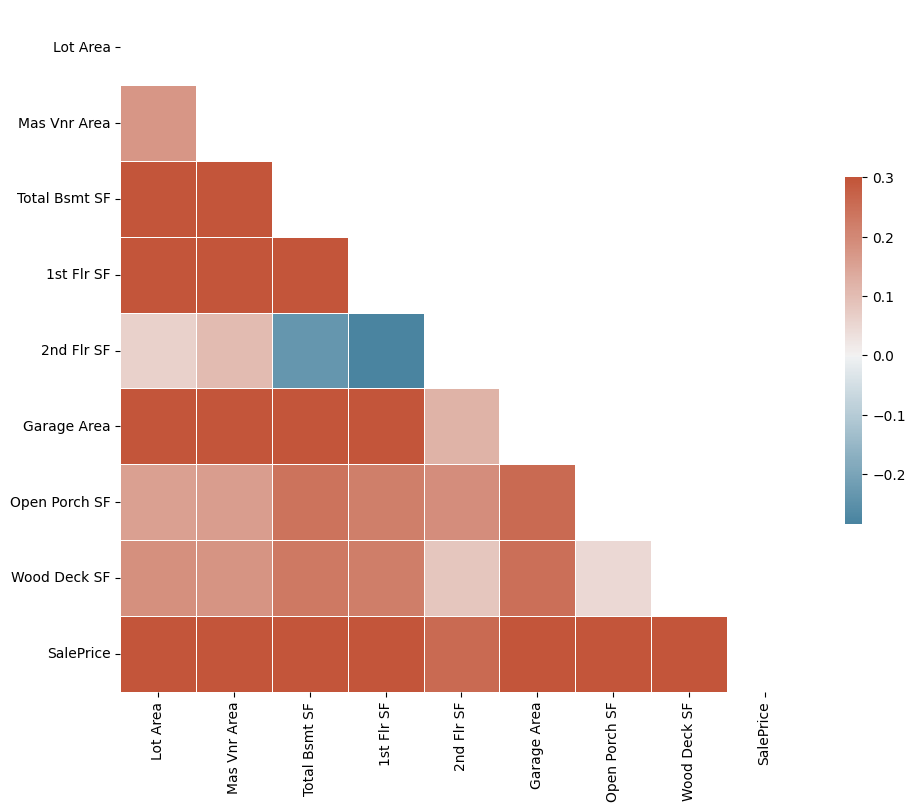

In [27]:
# Compute the correlation matrix
corr = housing_area.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

## 2.2 About the Quality and Condition Related Variables

In [28]:
# List of columns to keep in the new DataFrame
columns_to_keep = [
    'Overall Qual', 'Overall Cond', 'Exter Qual', 'Exter Cond', 
    'Bsmt Qual', 'Bsmt Cond', 'Heating QC', 'Kitchen Qual', 
    'Fireplace Qu', 'Garage Qual', 'Pool QC', 'Fence', 'SalePrice'
]

# Creating the subset
housing_quality = housing[columns_to_keep]


C:\Users\coral\AppData\Local\Temp\ipykernel_27444\2871770685.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  housing_quality[col] = housing_quality[col].astype(str)
C:\Users\coral\AppData\Local\Temp\ipykernel_27444\2871770685.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  housing_quality[col] = housing_quality[col].astype(str)


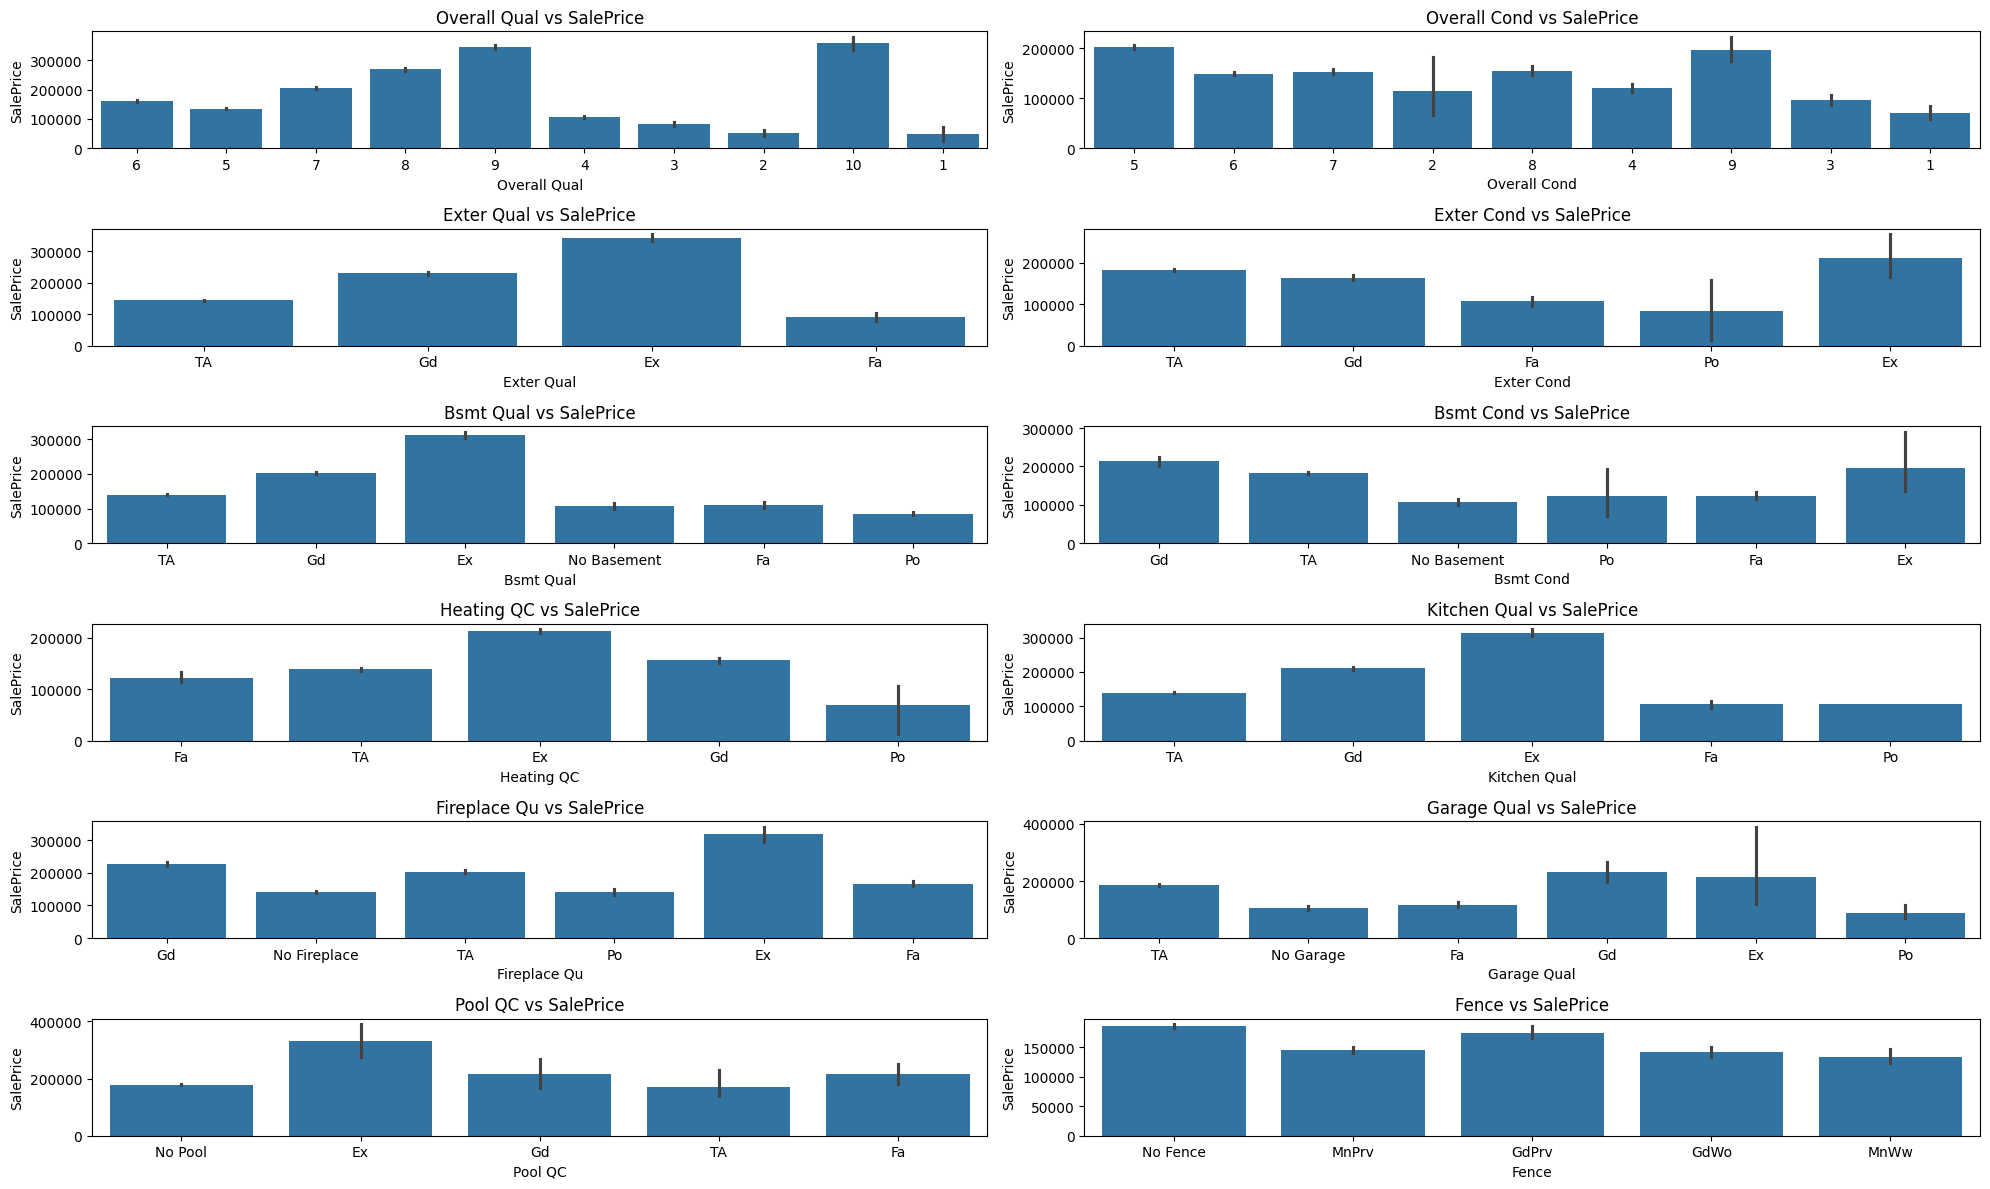

In [29]:
columns_to_transform = [
    'Overall Qual', 'Overall Cond'
]

for col in columns_to_transform:
    housing_quality[col] = housing_quality[col].astype(str)

# List of categorical columns to plot against SalePrice
cat_columns = housing_quality.select_dtypes(include=['object', 'category']).columns.tolist()

# Create a grid of barplots for each categorical variable
fig, axes = plt.subplots(nrows=(len(cat_columns) // 2) + (len(cat_columns) % 2), ncols=2, figsize=(20, 12))

# Flatten the axes array to make it easier to index in a loop
axes = axes.flatten()

# Plot barplots for each categorical variable
for i, col in enumerate(cat_columns):
    sns.barplot(data=housing_quality, x=col, y='SalePrice', ax=axes[i])
    axes[i].set_title(f'{col} vs SalePrice')

# Adjust the layout
plt.tight_layout()
plt.show()

## 2.3 About the Street / Alley

In [30]:
# List of columns to keep in the new DataFrame
columns_to_keep = [
    'Street', 'Alley','SalePrice'
]

# Creating the subset
housing_street = housing[columns_to_keep]


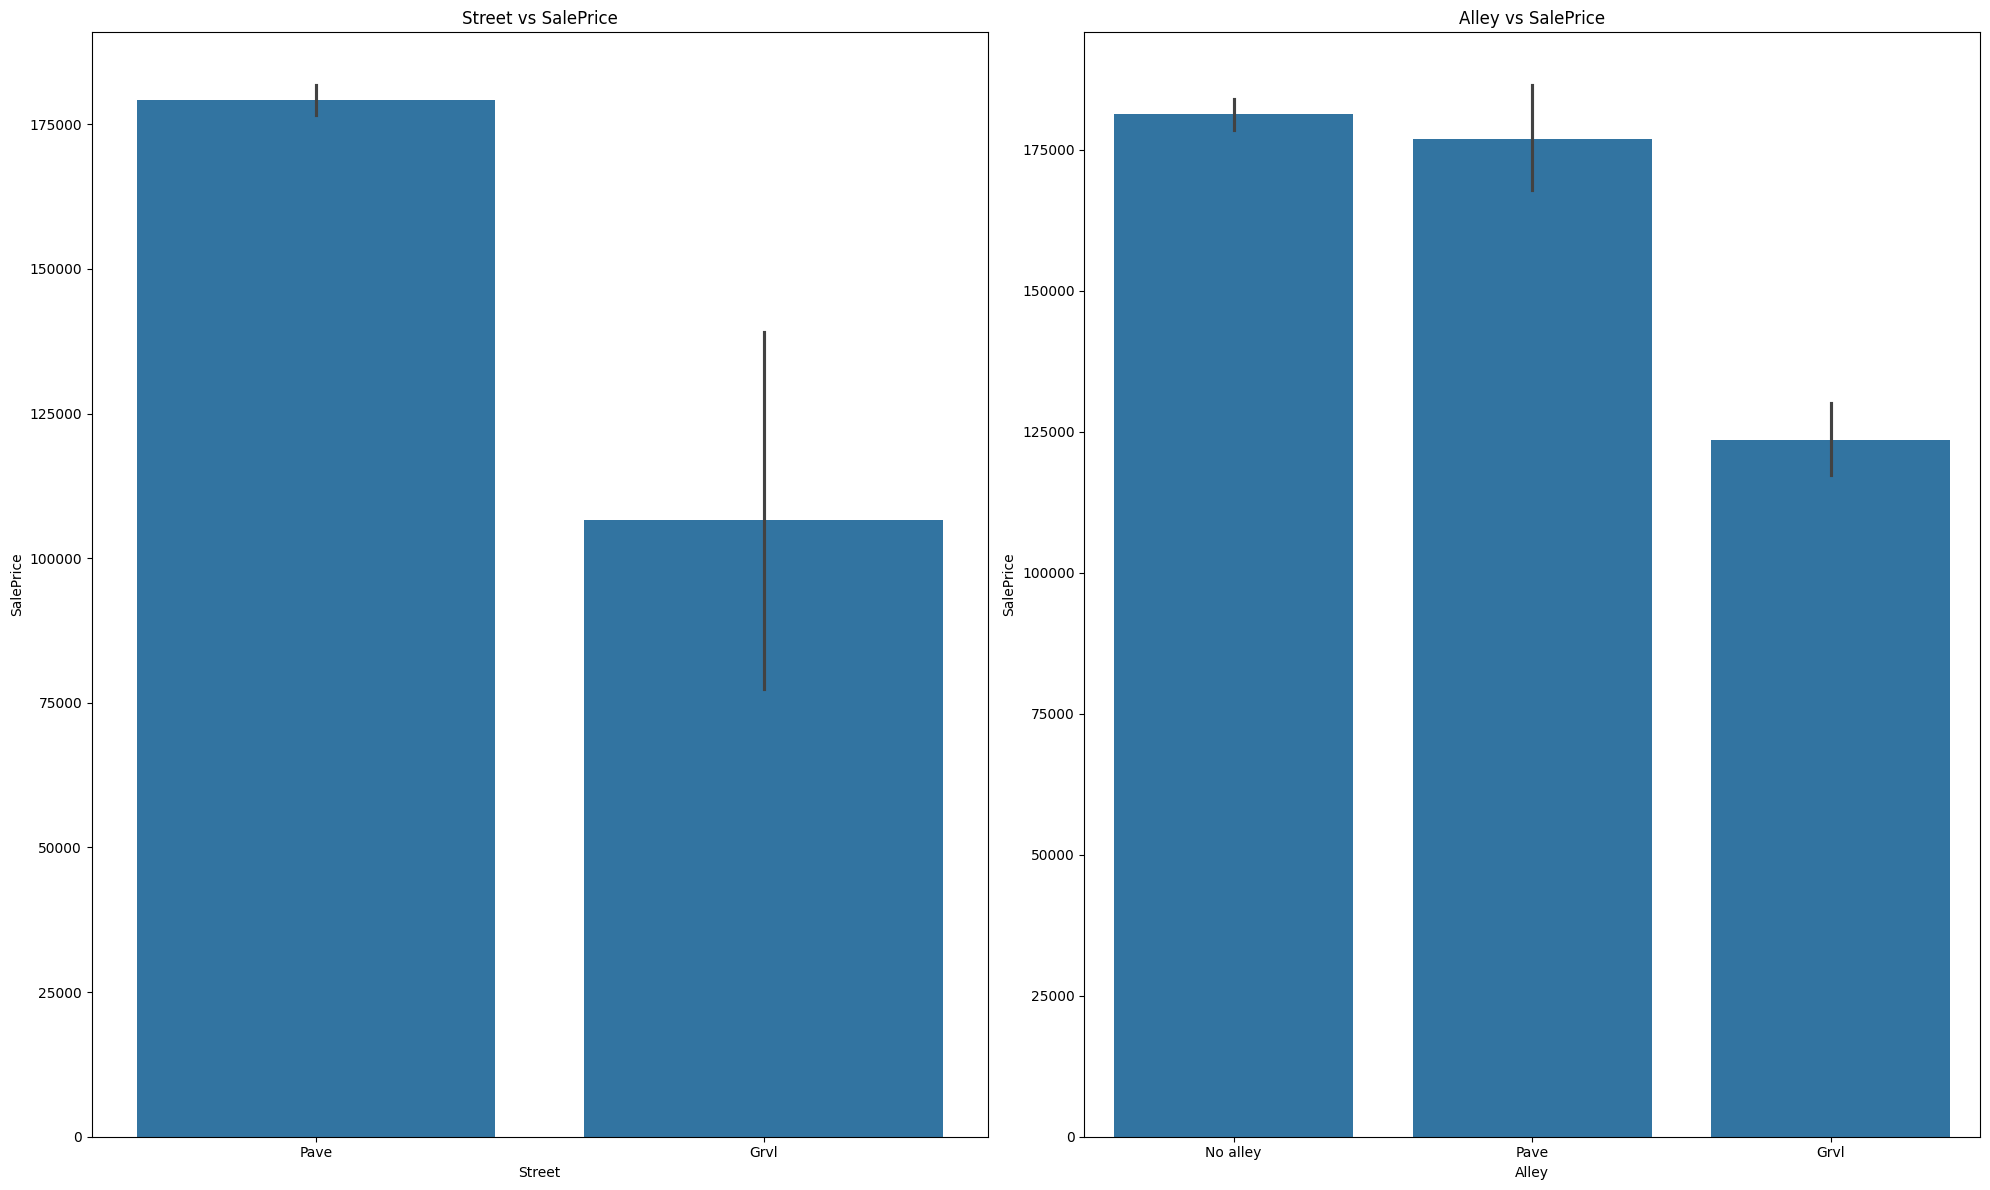

In [31]:
# List of categorical columns to plot against SalePrice
cat_columns = housing_street.select_dtypes(include=['object', 'category']).columns.tolist()

# Create a grid of barplots for each categorical variable
fig, axes = plt.subplots(nrows=(len(cat_columns) // 2) + (len(cat_columns) % 2), ncols=2, figsize=(20, 12))

# Flatten the axes array to make it easier to index in a loop
axes = axes.flatten()

# Plot barplots for each categorical variable
for i, col in enumerate(cat_columns):
    sns.barplot(data=housing_street, x=col, y='SalePrice', ax=axes[i])
    axes[i].set_title(f'{col} vs SalePrice')

# Adjust the layout
plt.tight_layout()
plt.show()

## 2.4 About the Equipments

In [32]:
# List of columns to keep in the new DataFrame
columns_to_keep = [
    'Utilities', 'Heating','Central Air','Electrical','SalePrice'
]

# Creating the subset
housing_equipment = housing[columns_to_keep]


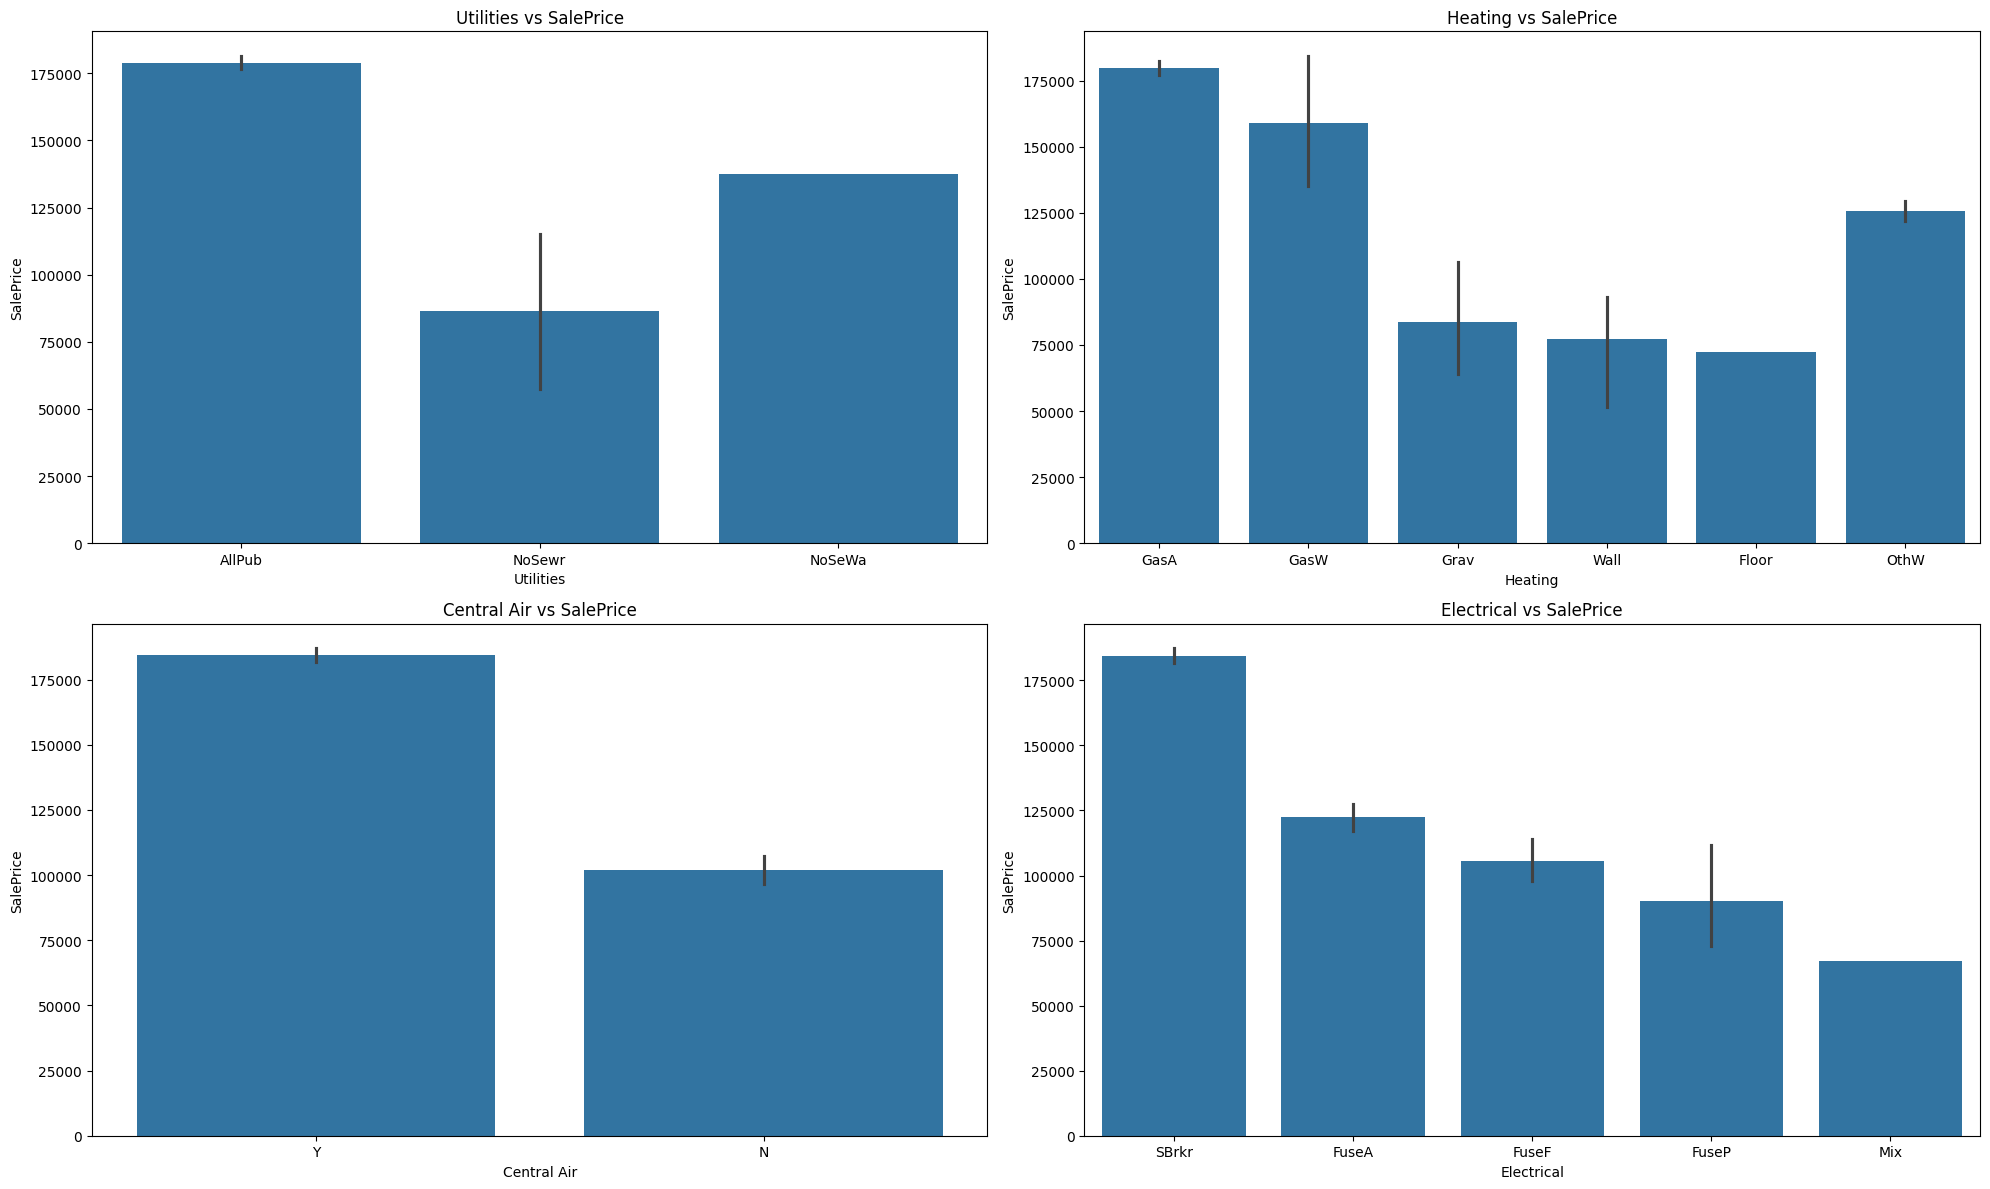

In [33]:
# List of categorical columns to plot against SalePrice
cat_columns = housing_equipment.select_dtypes(include=['object', 'category']).columns.tolist()

# Create a grid of barplots for each categorical variable
fig, axes = plt.subplots(nrows=(len(cat_columns) // 2) + (len(cat_columns) % 2), ncols=2, figsize=(20, 12))

# Flatten the axes array to make it easier to index in a loop
axes = axes.flatten()

# Plot barplots for each categorical variable
for i, col in enumerate(cat_columns):
    sns.barplot(data=housing_equipment, x=col, y='SalePrice', ax=axes[i])
    axes[i].set_title(f'{col} vs SalePrice')

# Adjust the layout
plt.tight_layout()
plt.show()

## 2.5 About the House Lot / Shape / Slope

In [34]:
# List of columns to keep in the new DataFrame
columns_to_keep = [
    'Lot Shape', 'Lot Config','Land Contour','Land Slope','Neighborhood','Condition 1','Condition 2','SalePrice'
]

# Creating the subset
housing_lot = housing[columns_to_keep]


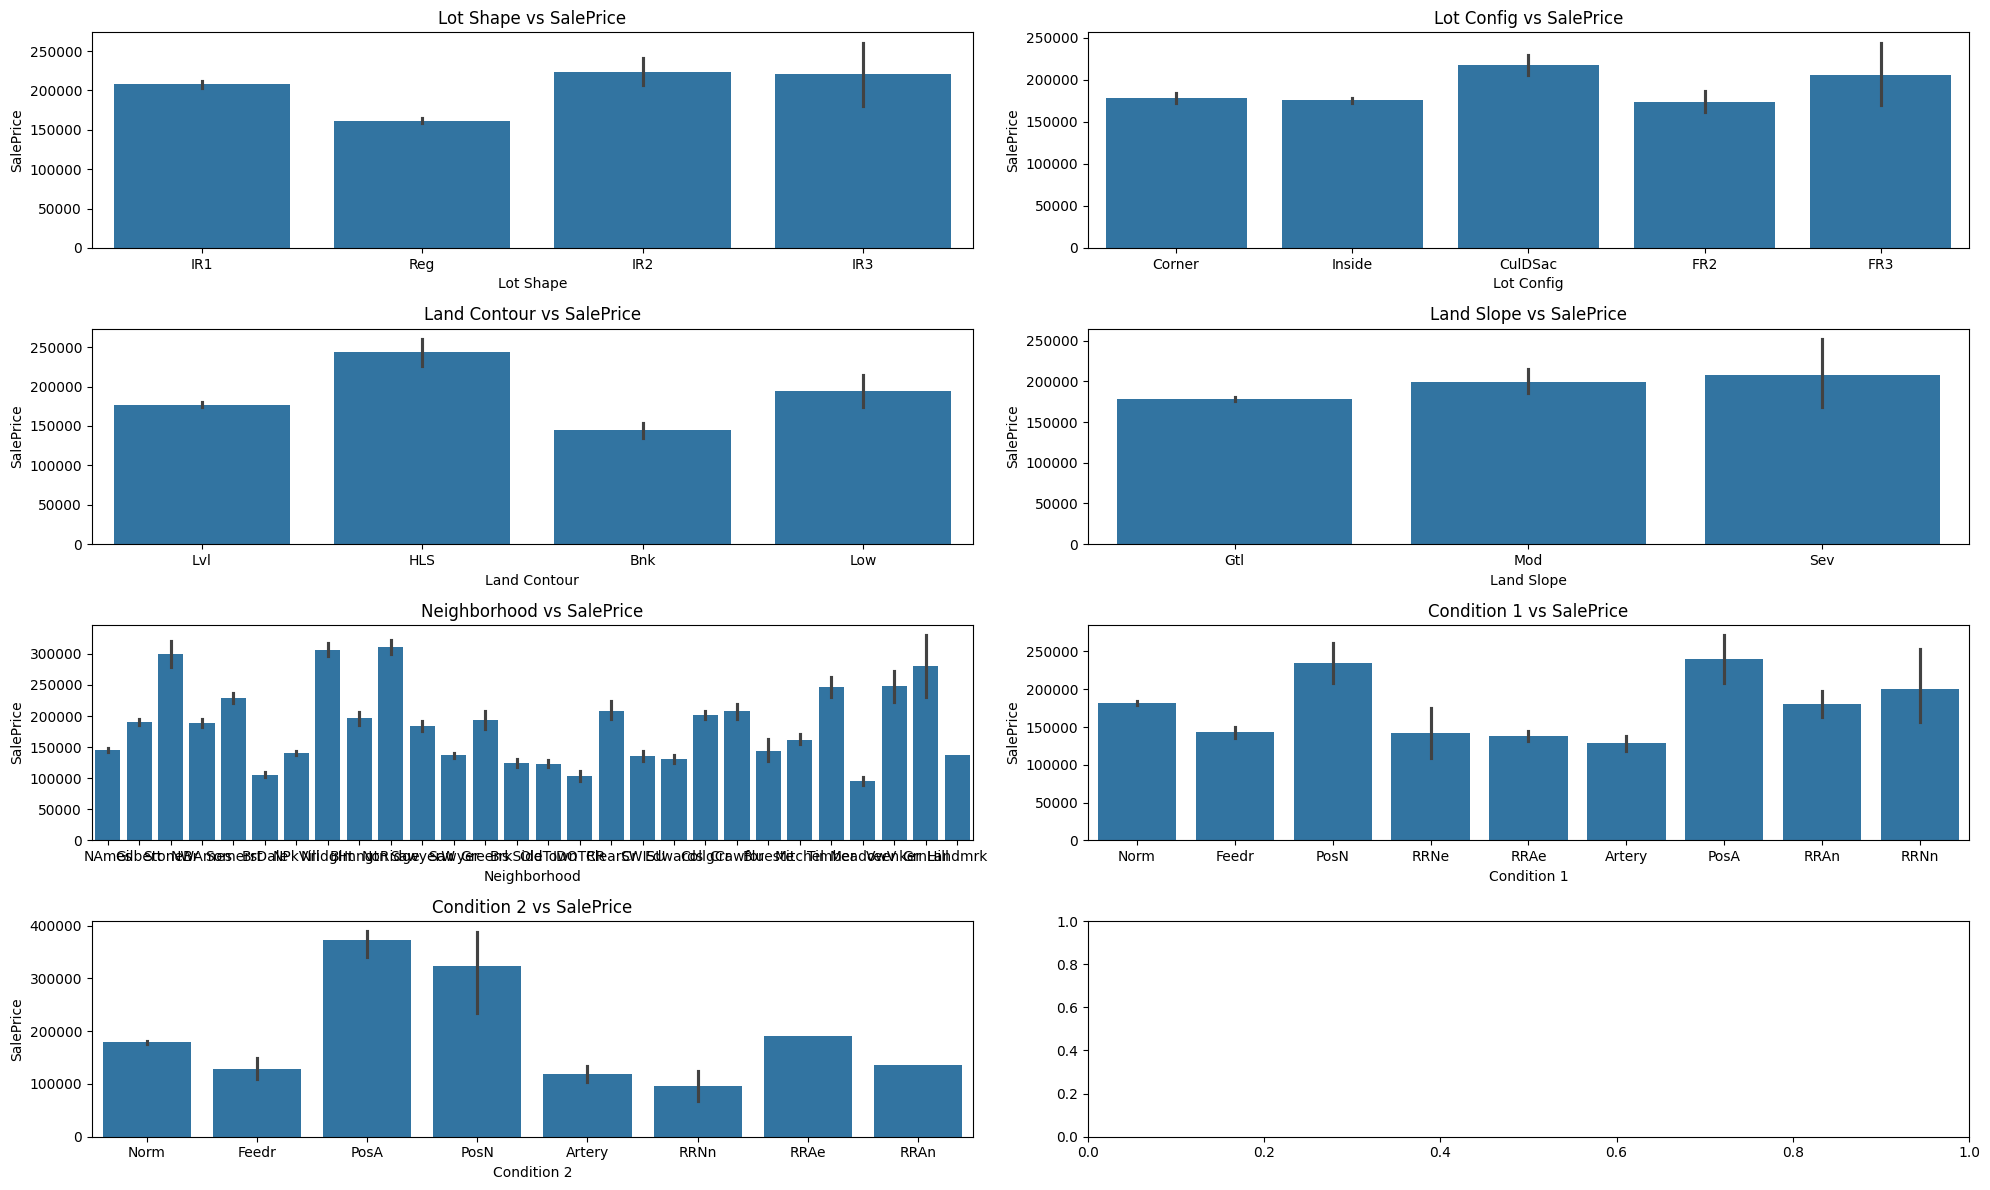

In [35]:
# List of categorical columns to plot against SalePrice
cat_columns = housing_lot.select_dtypes(include=['object', 'category']).columns.tolist()

# Create a grid of barplots for each categorical variable
fig, axes = plt.subplots(nrows=(len(cat_columns) // 2) + (len(cat_columns) % 2), ncols=2, figsize=(20, 12))

# Flatten the axes array to make it easier to index in a loop
axes = axes.flatten()

# Plot barplots for each categorical variable
for i, col in enumerate(cat_columns):
    sns.barplot(data=housing_lot, x=col, y='SalePrice', ax=axes[i])
    axes[i].set_title(f'{col} vs SalePrice')

# Adjust the layout
plt.tight_layout()
plt.show()

## 2.6 About the Type of Building

In [36]:
# List of columns to keep in the new DataFrame
columns_to_keep = [
    'Bldg Type', 'House Style','Roof Style','Roof Matl','Foundation','SalePrice'
]

# Creating the subset
housing_building = housing[columns_to_keep]


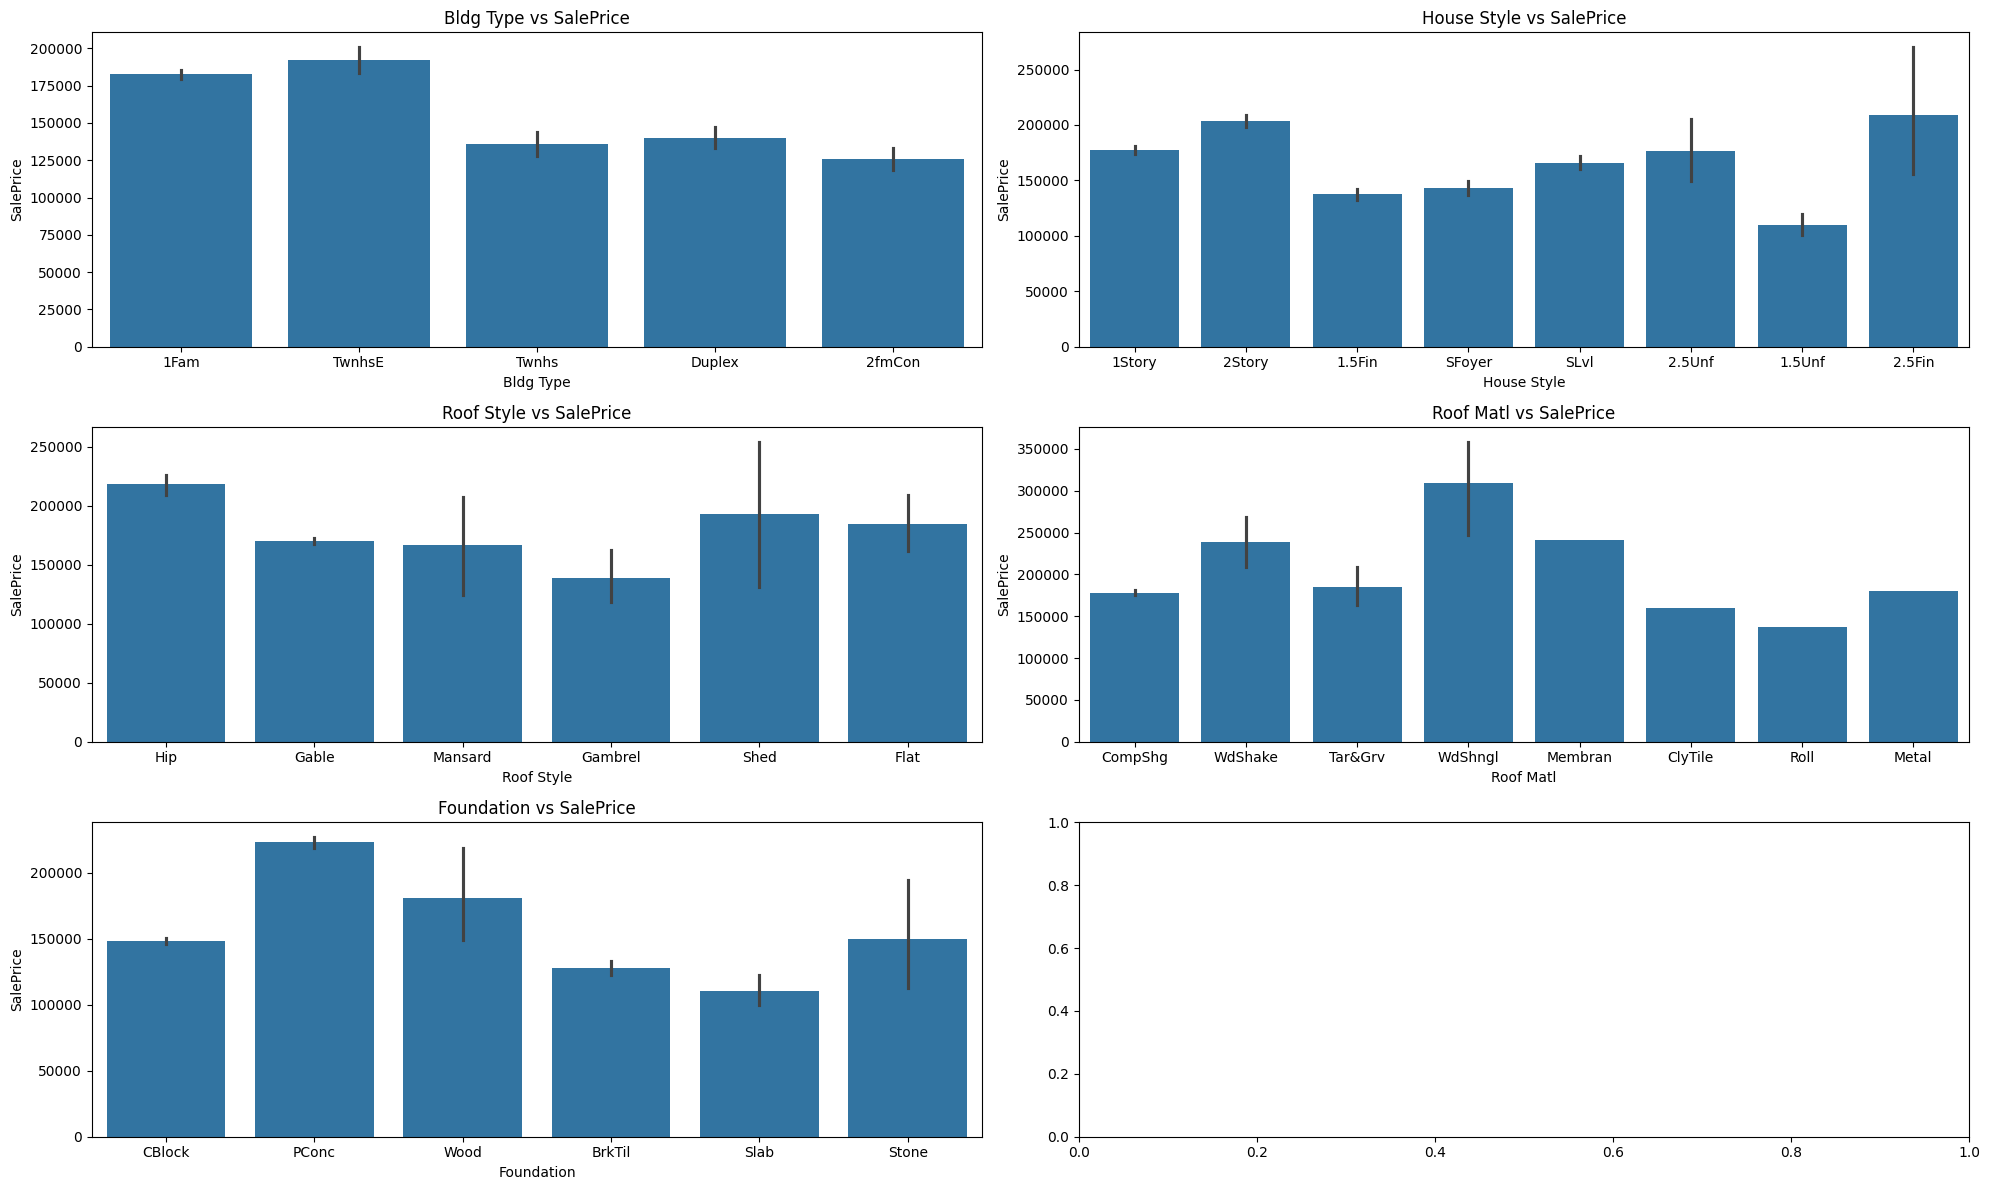

In [37]:
# List of categorical columns to plot against SalePrice
cat_columns = housing_building.select_dtypes(include=['object', 'category']).columns.tolist()

# Create a grid of barplots for each categorical variable
fig, axes = plt.subplots(nrows=(len(cat_columns) // 2) + (len(cat_columns) % 2), ncols=2, figsize=(20, 12))

# Flatten the axes array to make it easier to index in a loop
axes = axes.flatten()

# Plot barplots for each categorical variable
for i, col in enumerate(cat_columns):
    sns.barplot(data=housing_building, x=col, y='SalePrice', ax=axes[i])
    axes[i].set_title(f'{col} vs SalePrice')

# Adjust the layout
plt.tight_layout()
plt.show()

## 2.7 About the Age and Renovations of the House

In [38]:
# List of columns to keep in the new DataFrame
columns_to_keep = [
    'Year Built', 'Year Remod/Add','SalePrice'
]

# Creating the subset
housing_year = housing[columns_to_keep]


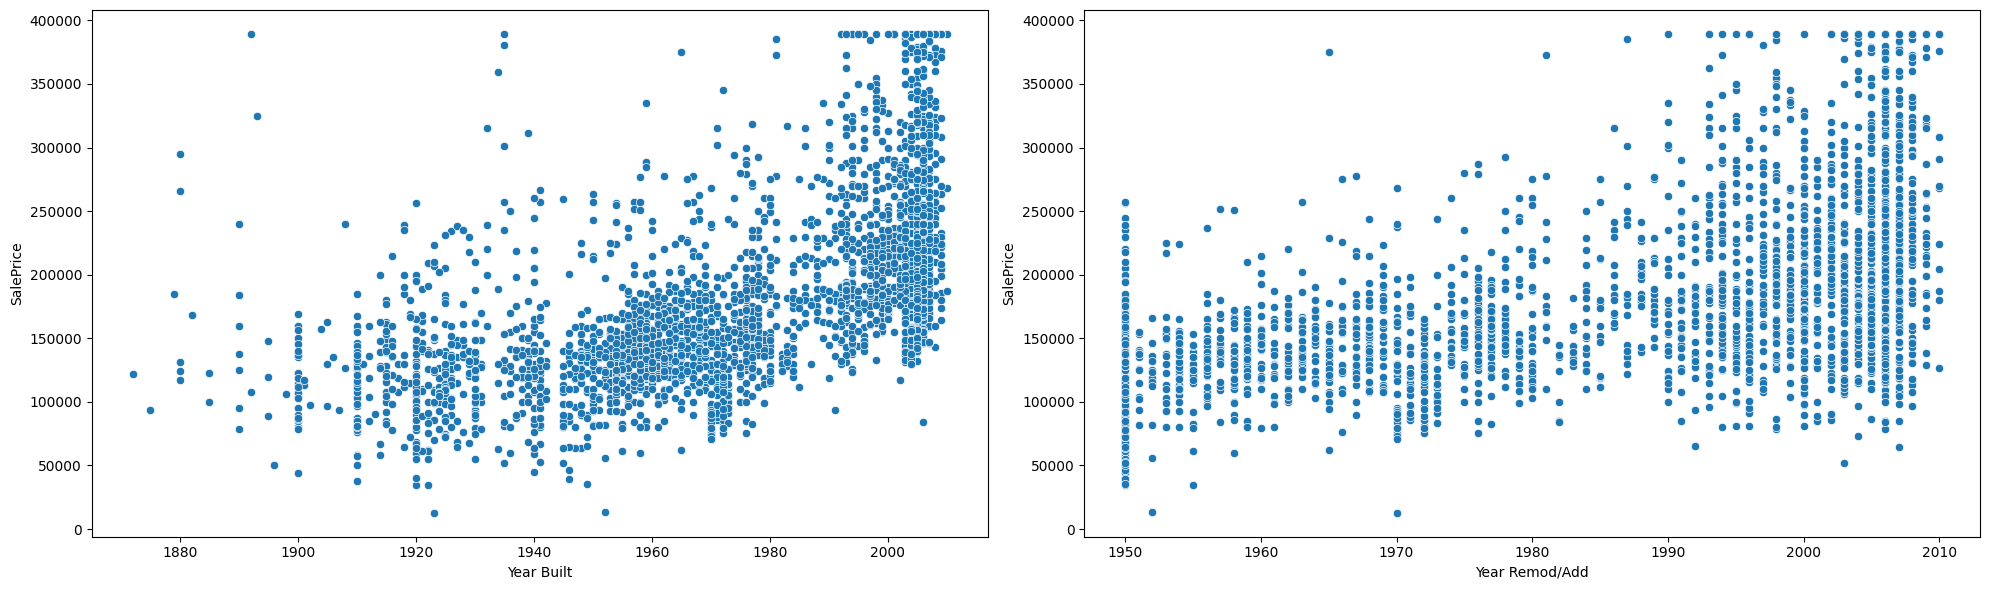

In [39]:
plt.figure(figsize=(20, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(data=housing_year, x='Year Built', y='SalePrice')

plt.subplot(1, 2, 2)
sns.scatterplot(data=housing_year, x='Year Remod/Add', y='SalePrice')

plt.tight_layout()
plt.show()

## 2.8 About the Interior of the House

In [40]:
# List of columns to keep in the new DataFrame
columns_to_keep = [
    'Bedroom AbvGr', 'TotRms AbvGrd','Full Bath', 'Half Bath','Fireplaces','Kitchen AbvGr','Gr Liv Area','SalePrice'
]

# Creating the subset
housing_int = housing[columns_to_keep]


C:\Users\coral\AppData\Local\Temp\ipykernel_27444\172154348.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  housing_int[col] = housing_int[col].astype(str)
C:\Users\coral\AppData\Local\Temp\ipykernel_27444\172154348.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  housing_int[col] = housing_int[col].astype(str)
C:\Users\coral\AppData\Local\Temp\ipykernel_27444\172154348.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_ind

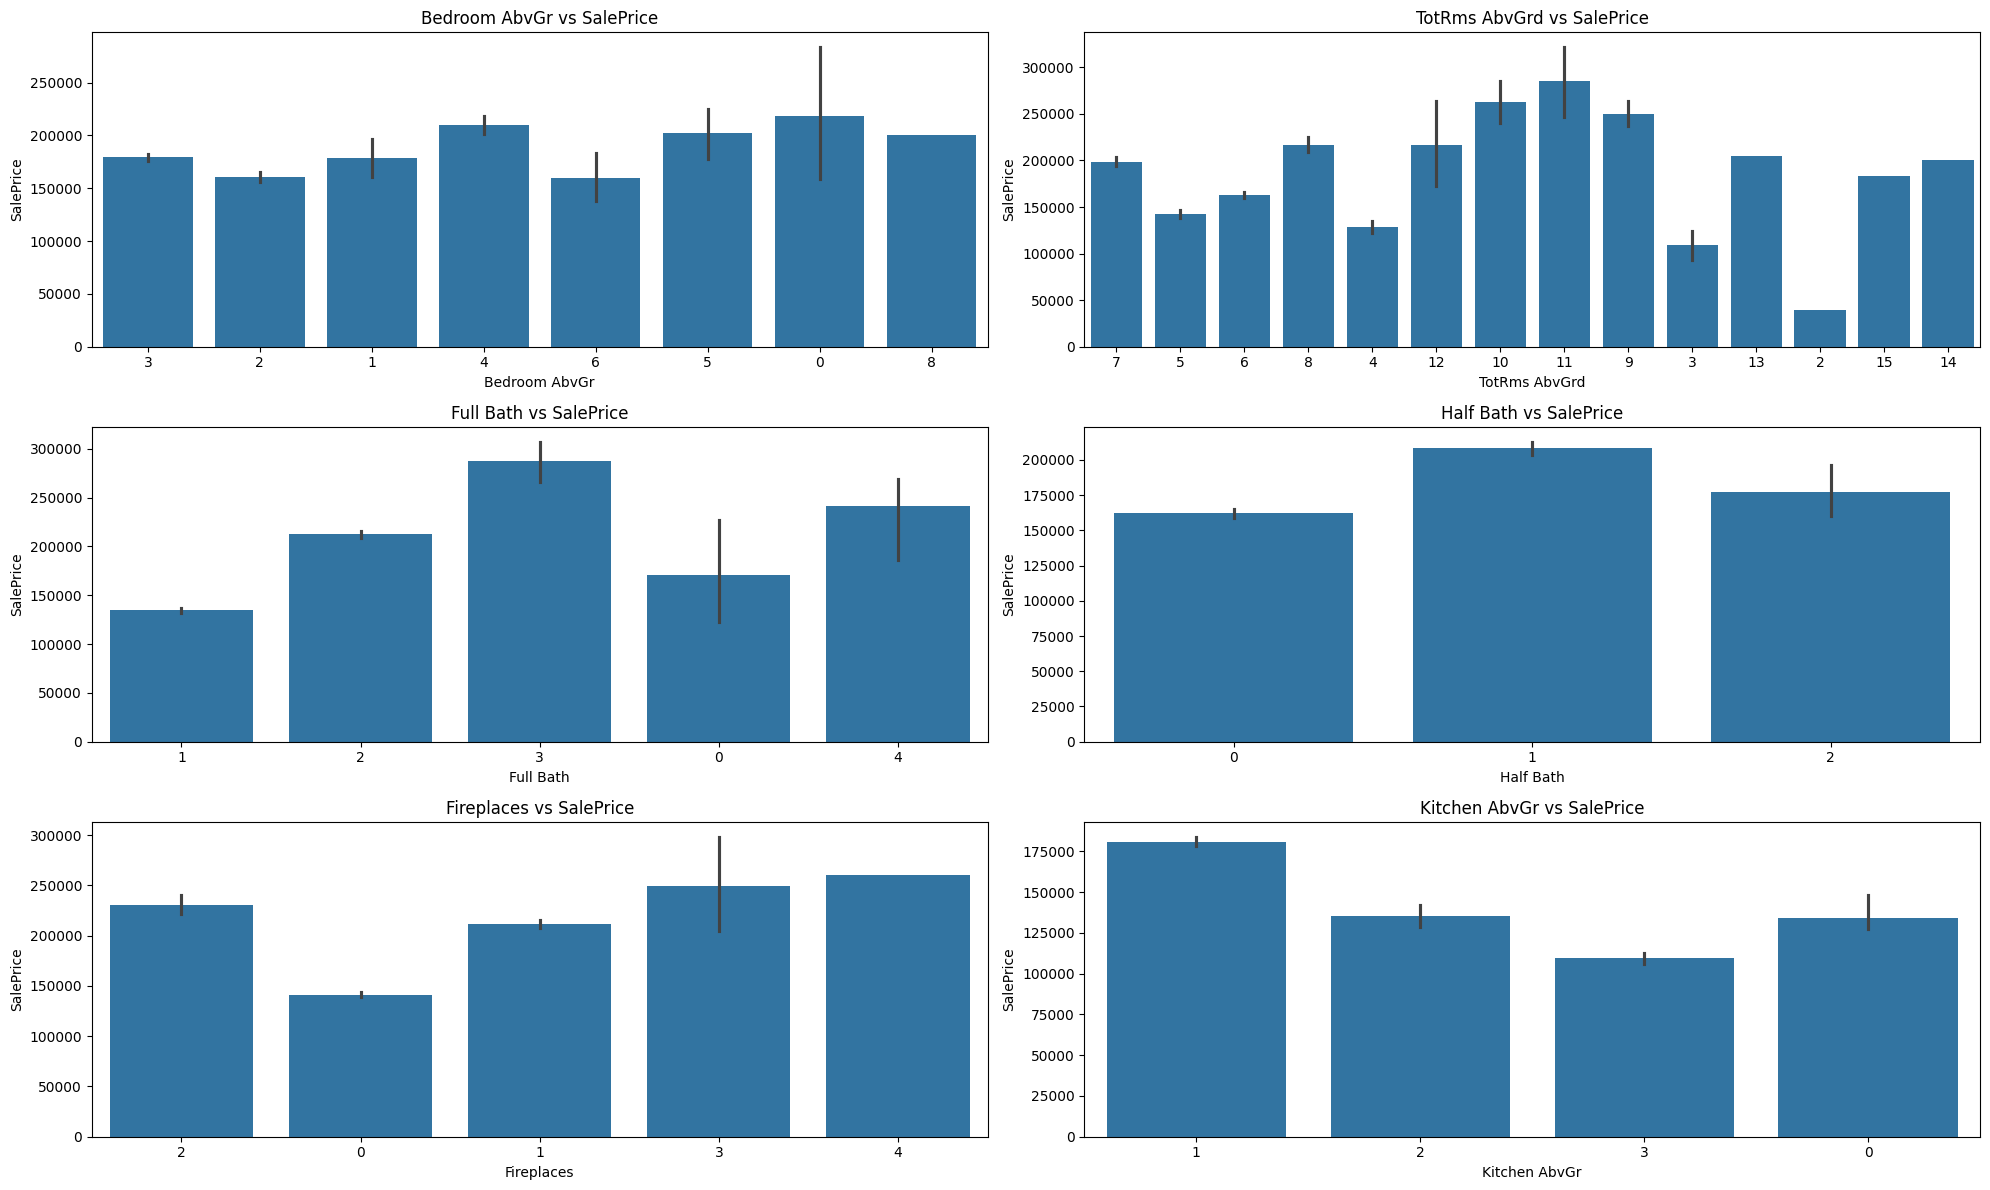

In [41]:
columns_to_transform = [
    'Bedroom AbvGr', 'TotRms AbvGrd', 'Full Bath', 
    'Half Bath', 'Fireplaces', 'Kitchen AbvGr'
]

for col in columns_to_transform:
    housing_int[col] = housing_int[col].astype(str)

# List of categorical columns to plot against SalePrice
cat_columns = housing_int.select_dtypes(include=['object', 'category']).columns.tolist()

# Create a grid of barplots for each categorical variable
fig, axes = plt.subplots(nrows=(len(cat_columns) // 2) + (len(cat_columns) % 2), ncols=2, figsize=(20, 12))

# Flatten the axes array to make it easier to index in a loop
axes = axes.flatten()

# Plot barplots for each categorical variable
for i, col in enumerate(cat_columns):
    sns.barplot(data=housing_int, x=col, y='SalePrice', ax=axes[i])
    axes[i].set_title(f'{col} vs SalePrice')

# Adjust the layout
plt.tight_layout()
plt.show()

## 2.9 About the Basement

In [42]:
# List of columns to keep in the new DataFrame
columns_to_keep = [
    'Total Bsmt SF', 'Bsmt Qual','Bsmt Cond', 'Bsmt Exposure','BsmtFin Type 1','SalePrice'
]

# Creating the subset
housing_bsmt = housing[columns_to_keep]

<Axes: xlabel='Total Bsmt SF', ylabel='SalePrice'>

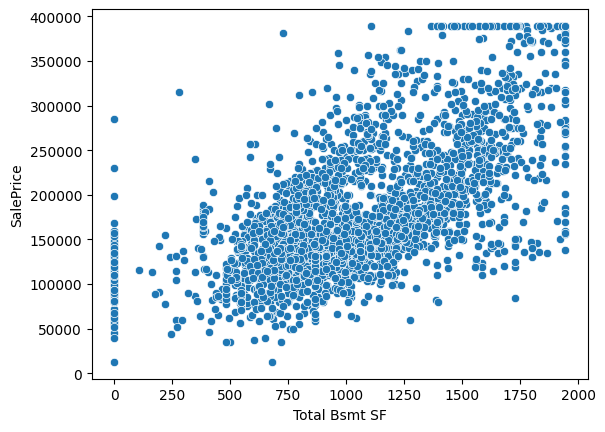

In [43]:
sns.scatterplot(data=housing_bsmt, x='Total Bsmt SF', y='SalePrice')

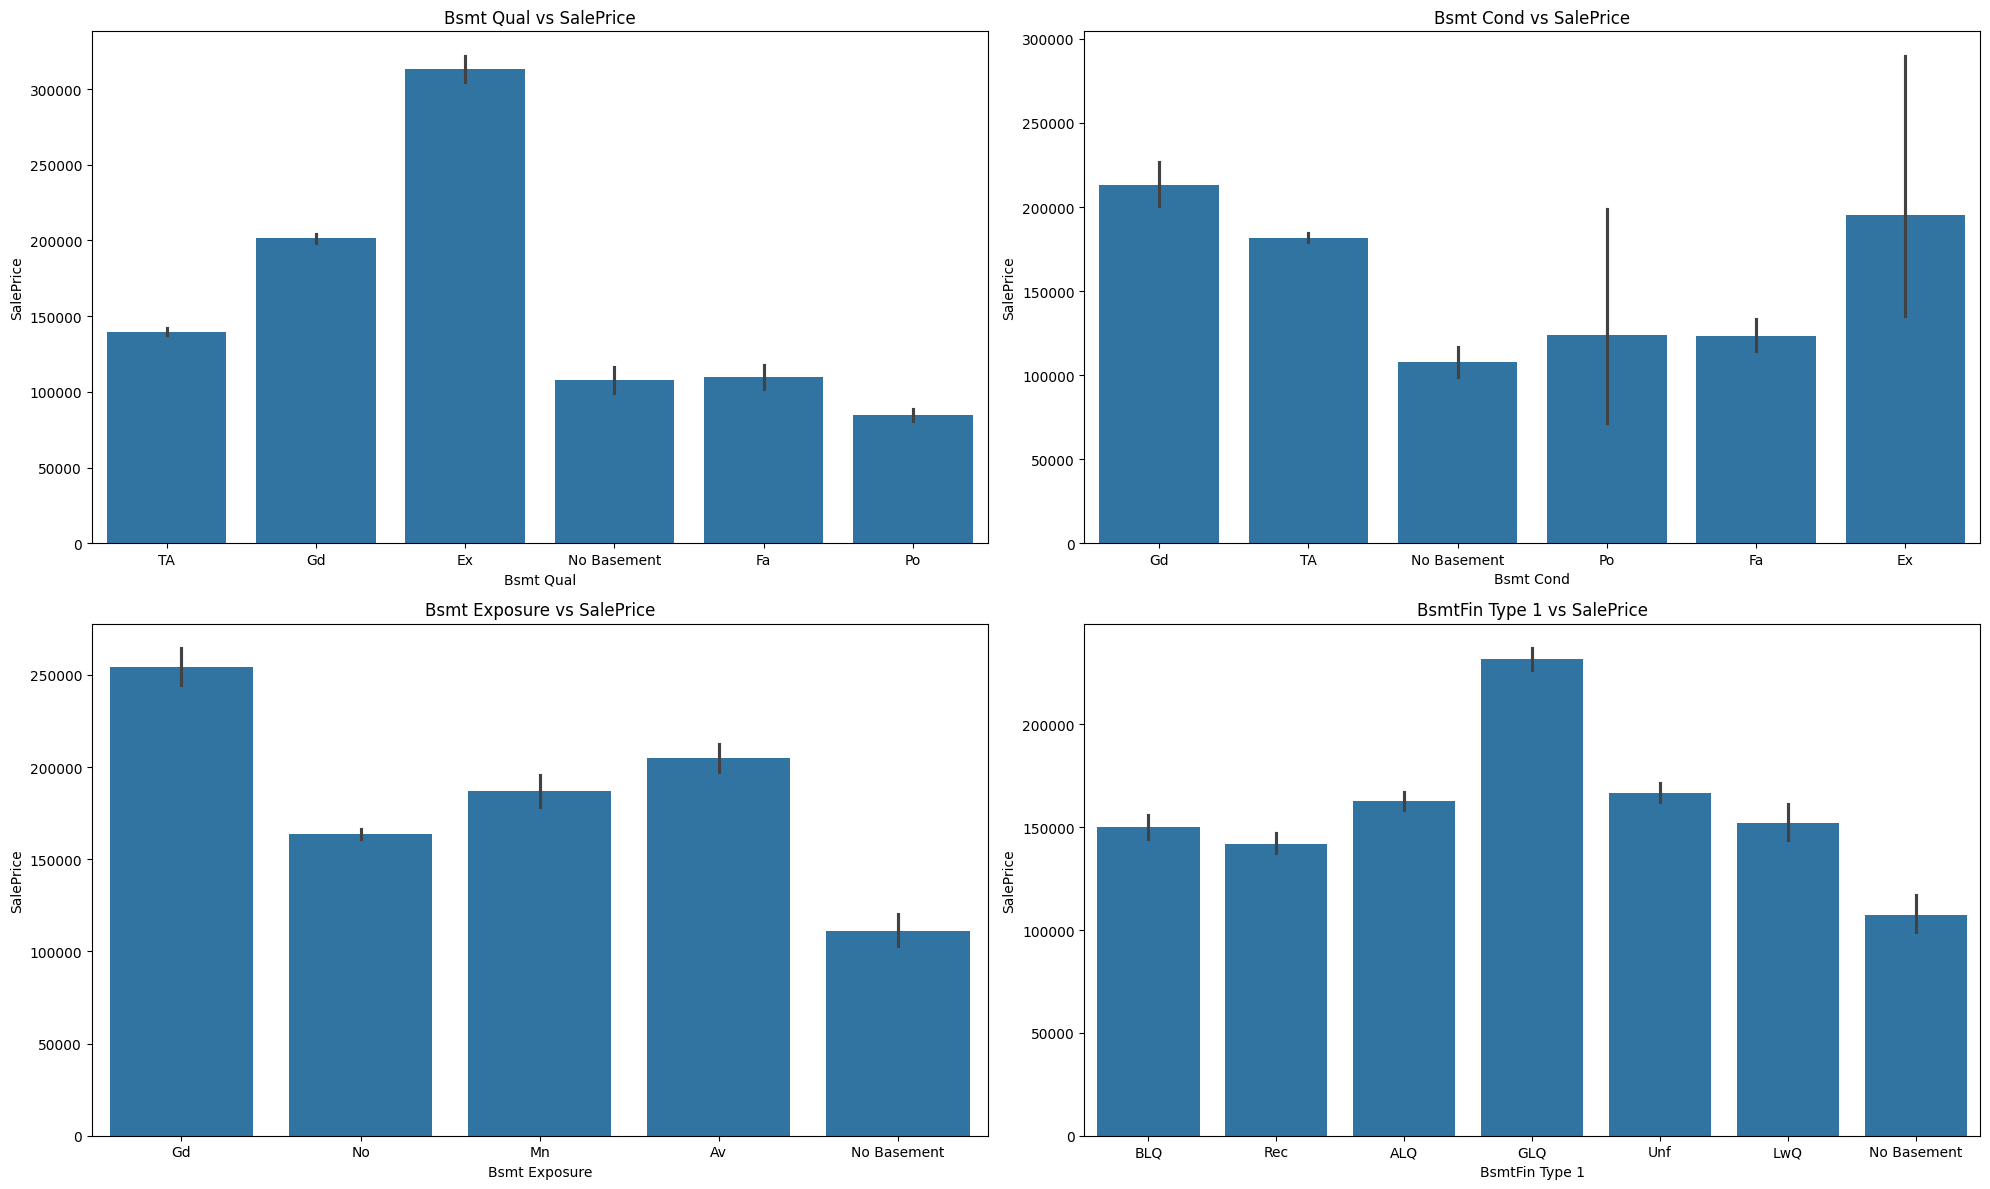

In [44]:
# List of categorical columns to plot against SalePrice
cat_columns = housing_bsmt.select_dtypes(include=['object', 'category']).columns.tolist()

# Create a grid of barplots for each categorical variable
fig, axes = plt.subplots(nrows=(len(cat_columns) // 2) + (len(cat_columns) % 2), ncols=2, figsize=(20, 12))

# Flatten the axes array to make it easier to index in a loop
axes = axes.flatten()

# Plot barplots for each categorical variable
for i, col in enumerate(cat_columns):
    sns.barplot(data=housing_bsmt, x=col, y='SalePrice', ax=axes[i])
    axes[i].set_title(f'{col} vs SalePrice')

# Adjust the layout
plt.tight_layout()
plt.show()

# 3. Feature Engineering

## 3.1 Correlated variables

Here, we first consider the quantitatives variables of our dataset. We decide, in order to avoid multicollinearity in our future models to get rid of the variables that are too well correlated between them (except those correlated to SalePrice).

In [45]:
housing_quanti= housing.select_dtypes(exclude=['object'])

In [46]:
housing_quanti.corr()['SalePrice'].sort_values(ascending = False, ).to_frame().T

SalePrice  Overall Qual  Gr Liv Area  Garage Cars  Garage Area  \
SalePrice        1.0      0.817569     0.723548     0.669846     0.663204   

           Total Bsmt SF  1st Flr SF  Year Built  Full Bath  Year Remod/Add  \
SalePrice       0.647572    0.638538    0.588257    0.56321        0.561646   

           ...  3Ssn Porch  BsmtFin SF 2  Misc Val   Yr Sold  Bsmt Half Bath  \
SalePrice  ...    0.037758      0.003761  -0.01495 -0.029725        -0.04003   

           Low Qual Fin SF  MS SubClass  Overall Cond  Kitchen AbvGr  \
SalePrice        -0.043809    -0.084361     -0.101347      -0.126502   

           Enclosed Porch  
SalePrice       -0.134153  

[1 rows x 36 columns]

In [47]:
# Compute correlation matrix
correlation_matrix = housing_quanti.corr().abs()

# Set the correlation threshold
threshold = 0.85

# Keep track of columns to drop
columns_to_drop = set()

# Iterate through the upper triangle of the correlation matrix
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            col_i = correlation_matrix.columns[i]
            col_j = correlation_matrix.columns[j]
            # Keep 'SalePrice', but drop one of the other columns
            if col_j == 'SalePrice':
                columns_to_drop.add(col_i)  # Drop col_i
            elif col_i == 'SalePrice':
                columns_to_drop.add(col_j)  # Drop col_j
            else:
                # Drop col_i or col_j arbitrarily (you can prioritize differently here)
                columns_to_drop.add(col_i)

# Drop the identified columns
housing = housing.drop(columns=columns_to_drop)

# Print the remaining columns and their count
print("Remaining columns:", housing.columns)
print("Number of remaining columns:", len(housing.columns))

Remaining columns: Index(['MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area', 'Street',
       'Alley', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config',
       'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type',
       'House Style', 'Overall Qual', 'Overall Cond', 'Year Built',
       'Year Remod/Add', 'Roof Style', 'Roof Matl', 'Exterior 1st',
       'Exterior 2nd', 'Mas Vnr Type', 'Mas Vnr Area', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2',
       'Bsmt Unf SF', 'Total Bsmt SF', 'Heating', 'Heating QC', 'Central Air',
       'Electrical', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF',
       'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath',
       'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual',
       'TotRms AbvGrd', 'Functional', 'Fireplaces', 'Fireplace Qu',
       'Garage Type', 'Garage Yr Blt', 'Ga

The variable "Garage Area" was removed from our dataset. Before going on with the modelisation we thus have at hand 78 potential explanatory variables for the Sale Price. 

## 3.3 One Hot Encoding

Finally, we 'one hot encode' our dataset, ie. we transform into dummy variables all of our qualitative variables (by takingg care of removing one modality for each one of them to deal with perfect collinearity issues). 

In [48]:
# Creating dummy variables in a new data set for categorical features
housing_encoded = pd.get_dummies(housing, drop_first= True) #Delete one of the dummies to avoid multicollinearity in the models

# The shape of new dataset
print(f"There are total {housing_encoded.shape[0]} rows and {housing_encoded.shape[1]} columns in the new dataset.")

housing_encoded.head()

There are total 2928 rows and 377 columns in the new dataset.


MS SubClass  Lot Frontage  Lot Area  Overall Qual  Overall Cond  \
0           20         100.0     20000             6             5   
1           20          80.0     11622             5             6   
2           20          81.0     14267             6             6   
3           20          93.0     11160             7             5   
4           60          74.0     13830             5             5   

   Year Built  Year Remod/Add  Mas Vnr Area  BsmtFin SF 1  BsmtFin SF 2  ...  \
0        1960            1960         112.0         639.0           0.0  ...   
1        1961            1961           0.0         468.0         144.0  ...   
2        1958            1958         108.0         923.0           0.0  ...   
3        1968            1968           0.0        1065.0           0.0  ...   
4        1997            1998           0.0         791.0           0.0  ...   

   Sale Type_ConLw  Sale Type_New  Sale Type_Oth  Sale Type_VWD  \
0            False          False          False          False   
1            False          False          False          False   
2            False          False          False          False   
3            False          False          False          False   
4            False          False          False          False   

   Sale Type_WD   Sale Condition_AdjLand  Sale Condition_Alloca  \
0           True                   False                  False   
1           True                   False                  False   
2           True                   False                  False   
3           True                   False                  False   
4           True                   False                  False   

   Sale Condition_Family  Sale Condition_Normal  Sale Condition_Partial  
0                  False                   True                   False  
1                  False                   True                   False  
2                  False                   True                   False  
3                  False                   True                   False  
4                  False                   True                   False  

[5 rows x 377 columns]

# 4. Train Test Split

For the encoded data set: 

In [49]:
# Split the dataset into features (X) and target (y)
X_encoded = housing_encoded.drop('SalePrice', axis=1)  
y_encoded = housing_encoded['SalePrice']

# Split the data into training and testing sets (80% train, 20% test)
X_train_encoded, X_test_encoded, y_train_encoded, y_test_encoded= train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=42)

# Display the shapes of the resulting datasets
print("Training features shape:", X_train_encoded.shape)
print("Test features shape:", X_test_encoded.shape)
print("Training target shape:", y_train_encoded.shape)
print("Test target shape:", y_test_encoded.shape)


Training features shape: (2342, 376)
Test features shape: (586, 376)
Training target shape: (2342,)
Test target shape: (586,)


In [50]:
# Standardize the features (important for Lasso regression for instance)
scaler = StandardScaler()
X_train_scaled_encoded = scaler.fit_transform(X_train_encoded)
X_test_scaled_encoded= scaler.transform(X_test_encoded)

# 5. Statistical Approach

## 5.1 Linear model 

This model implements a linear regression approach, where we use the relationship between input features and the target variable (SalePrice) to predict house prices based on the training data.

In [206]:
# Initialize the linear regression model
model = LinearRegression()

# Fit the model (training step)
model.fit(X_train_encoded, y_train_encoded)

print('Intercept:', model.intercept_)

Intercept: 378059.9436228218


In [238]:
# Make predictions on the training and test sets
y_pred_train = model.predict(X_train_encoded)
y_pred_test = model.predict(X_test_encoded)

# Calculate and print the metrics for the test set
mae = mean_absolute_error(y_test_encoded, y_pred_test)
rmse = np.sqrt(mean_squared_error(y_test_encoded, y_pred_test))
r2 = r2_score(y_test_encoded, y_pred_test)
r2_adj = 1 - (1-r2)*(len(y_test_encoded)-1)/(len(y_test_encoded)- X_test_encoded.shape[1]-1)
percentage_error = np.mean(abs(y_pred_test - y_test_encoded) / abs(y_test_encoded) * 100)

# Print the results
print(f'MAE of the model: {mae}')
print(f'RMSE of the model: {rmse}')
print(f'R²: {r2}')
print(f'Adjusted R² : {r2_adj}')
print(f'Percentage of error: {percentage_error:.2f}%')

MAE of the model: 14357.703883407488
RMSE of the model: 23190.099427835492
R²: 0.9030602026165478
Adjusted R² : 0.7286613326826819
Percentage of error: 9.05%


In [239]:
# Extract feature names if using a DataFrame
feature_names = X_train_encoded.columns if isinstance(X_train_encoded, pd.DataFrame) else np.arange(X_train_encoded.shape[1])

coefficients = model.coef_
coeff_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
coeff_df['Abs_Coefficient'] = coeff_df['Coefficient'].abs()
coeff_df_sorted = coeff_df.sort_values(by='Abs_Coefficient', ascending=False)

# Display the 20 first most significant predictors
print("\nTop predictors by magnitude:")
print(coeff_df_sorted.head(20))


Top predictors by magnitude:
                  Feature    Coefficient  Abs_Coefficient
116     Roof Matl_Membran  322252.576413    322252.576413
121     Roof Matl_WdShngl  319429.520247    319429.520247
118        Roof Matl_Roll  294933.124948    294933.124948
115     Roof Matl_CompShg  293284.183268    293284.183268
117       Roof Matl_Metal  292307.680220    292307.680220
120     Roof Matl_WdShake  287487.038715    287487.038715
119     Roof Matl_Tar&Grv  285610.455578    285610.455578
66   Neighborhood_GrnHill   97690.634104     97690.634104
154   Mas Vnr Type_CBlock  -68526.205278     68526.205278
94       Condition 2_PosA   67868.510353     67868.510353
340        Garage Qual_Po  -64237.175396     64237.175396
337        Garage Qual_Fa  -59188.250986     59188.250986
341        Garage Qual_TA  -58859.319988     58859.319988
256  Garage Yr Blt_1934.0   58360.918982     58360.918982
338        Garage Qual_Gd  -50330.570771     50330.570771
331  Garage Yr Blt_2010.0   48212.592493  

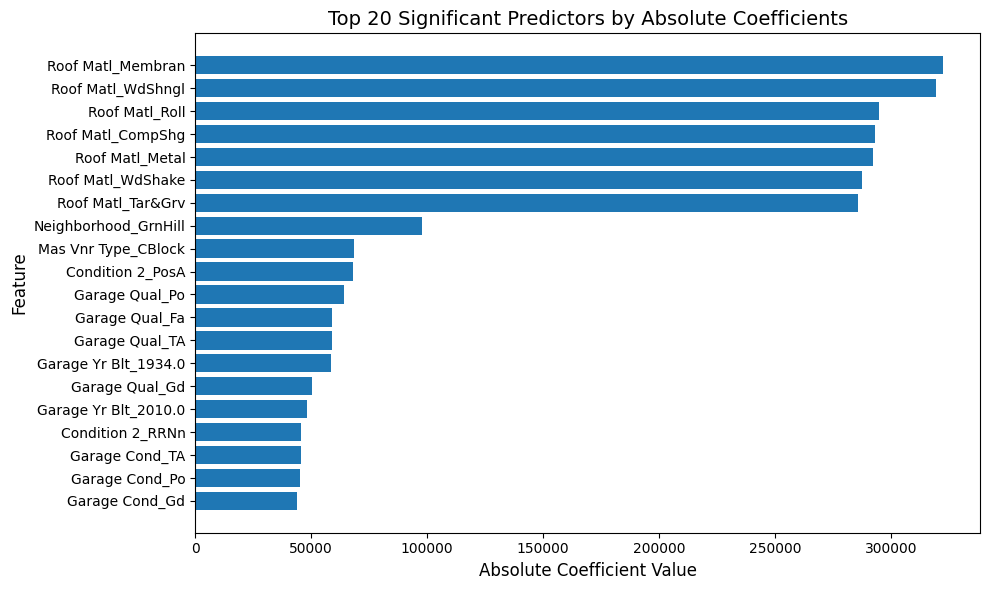

In [240]:
#Ploting the results
# Sort by absolute coefficients for significance
top_features = coeff_df_sorted.head(20)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(top_features['Feature'], top_features['Abs_Coefficient'])
plt.xlabel('Absolute Coefficient Value', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.title('Top 20 Significant Predictors by Absolute Coefficients', fontsize=14)
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.tight_layout()
plt.show()

We then analyse the residuals, to check the usuals assumption.

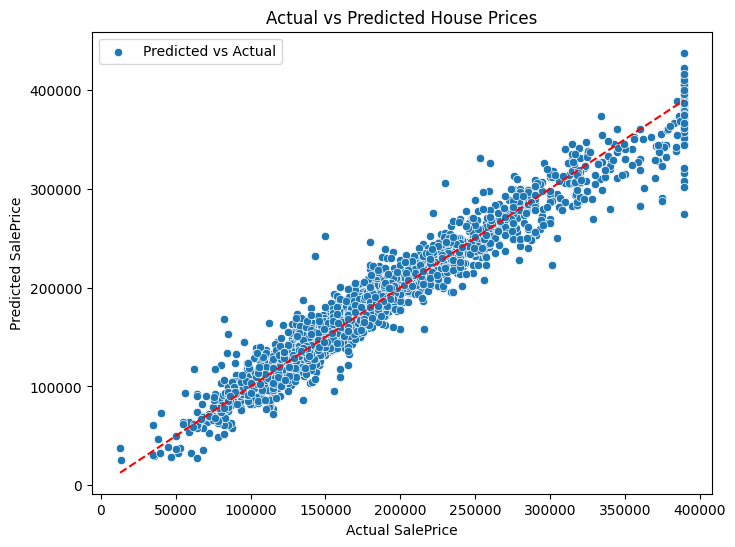

In [ ]:
# Create a dataframe for plotting
import pandas as pd
results = pd.DataFrame({'Actual': y_train_encoded, 'Predicted': y_pred_train})

# Plot the actual vs predicted prices
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Actual', y='Predicted', data=results, label='Predicted vs Actual')
plt.plot([min(results['Actual']), max(results['Actual'])], [min(results['Actual']), max(results['Actual'])], color='red', linestyle='--', label='Ideal Line')
plt.title('Actual vs Predicted House Prices')
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
plt.show()


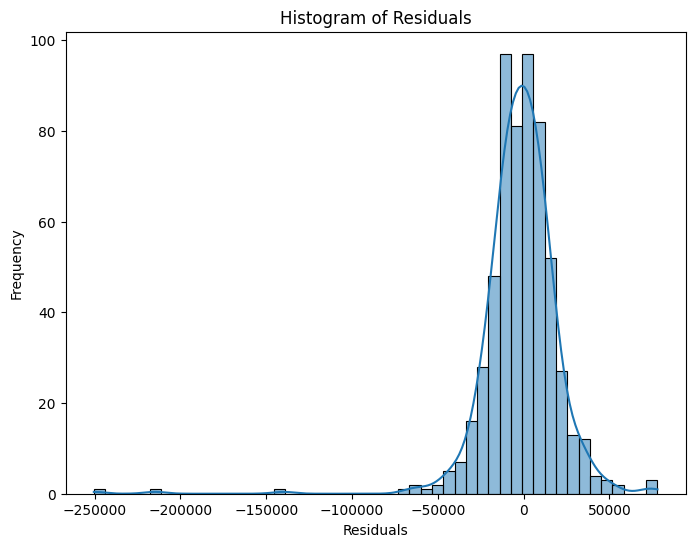

In [211]:
# Calculate residuals (difference between actual and predicted values)
residuals = y_test_encoded - y_pred_test

# 1. Plot a histogram of the residuals
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, bins=50)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

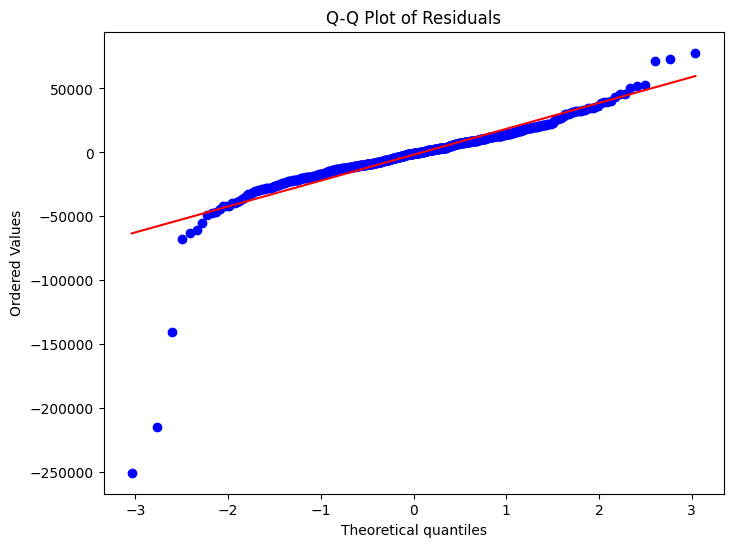

In [212]:
# 2. Q-Q plot
plt.figure(figsize=(8, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals")
plt.show()

## 5.2 Linear model with Lasso Penalty

Lasso regression is a linear model that applies L1 regularization to enforce sparsity, helping to improve model accuracy by reducing overfitting and selecting important features. We first do it without tuning the penalty parameter.

In [213]:
# Initialize the Lasso model with a chosen alpha (regularization strength)
alpha = 0.1 
lasso = Lasso(alpha=alpha)

# Fit the model
lasso.fit(X_train_scaled_encoded, y_train_encoded)

# Make predictions
y_pred_lasso = lasso.predict(X_test_scaled_encoded)

# Evaluate the model
mae = mean_absolute_error(y_test_encoded, y_pred_lasso)
rmse = np.sqrt(mean_squared_error(y_test_encoded, y_pred_lasso))
r2 = r2_score(y_test_encoded, y_pred_lasso)
r2_adj = 1 - (1-r2)*(len(y_test_encoded)-1)/(len(y_test_encoded)- X_test_encoded.shape[1]-1)
percentage_error = np.mean(abs(y_pred_lasso - y_test_encoded) / abs(y_test_encoded) * 100)

# Print the results
print(f'MAE of the Lasso model: {mae}')
print(f'RMSE of the Lasso model: {rmse}')
print(f'R² of the Lasso model: {r2}')
print(f'Adjusted R² of the Lasso model:{r2_adj}')
print(f'Percentage of error: {percentage_error:.2f}%')

MAE of the Lasso model: 14313.3933214842
RMSE of the Lasso model: 23014.843466272836
R² of the Lasso model: 0.9045198841847466
Adjusted R² of the Lasso model:0.7327470442491711
Percentage of error: 9.05%


c:\Users\emmab\anaconda3\envs\tse-m2\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.885e+11, tolerance: 1.218e+09
  model = cd_fast.enet_coordinate_descent(


Then, we want to improve the results of the model so we decide to do a cross validation to determine the right alpha.

In [214]:
# Lasso with cross-validation to choose alpha
lasso_cv = LassoCV(cv=5)  # 5-fold cross-validation
lasso_cv.fit(X_train_scaled_encoded, y_train_encoded)

# Best alpha found by cross-validation
print(f"Best alpha: {lasso_cv.alpha_}")

# Make predictions with the tuned Lasso model
y_pred_lasso_cv = lasso_cv.predict(X_test_scaled_encoded)

# Evaluate the model
mae_cv = mean_absolute_error(y_test_encoded, y_pred_lasso_cv)
rmse_cv = np.sqrt(mean_squared_error(y_test_encoded, y_pred_lasso_cv))
r2_cv = r2_score(y_test_encoded, y_pred_lasso_cv)
r2_adj_cv = 1 - (1-r2)*(len(y_test_encoded)-1)/(len(y_test_encoded)- X_test_encoded.shape[1]-1)
percentage_error = np.mean(abs(y_pred_lasso_cv - y_test_encoded) / abs(y_test_encoded) * 100)

print(f'MAE of the Lasso model (CV): {mae_cv}')
print(f'RMSE of the Lasso model (CV): {rmse_cv}')
print(f'R² of the Lasso model (CV): {r2_cv}')
print(f'Adjusted R² of the Lasso model (CV):{r2_adj_cv}')
print(f'Percentage of error: {percentage_error:.2f}%')


Best alpha: 387.0337784658329
MAE of the Lasso model (CV): 13894.55340687058
RMSE of the Lasso model (CV): 22511.744355087587
R² of the Lasso model (CV): 0.9086486052003755
Adjusted R² of the Lasso model (CV):0.7327470442491711
Percentage of error: 8.44%


The optimal value of alpha is found to be 590, and the plot below shows the eolution of the MSE for the different values of alpha.

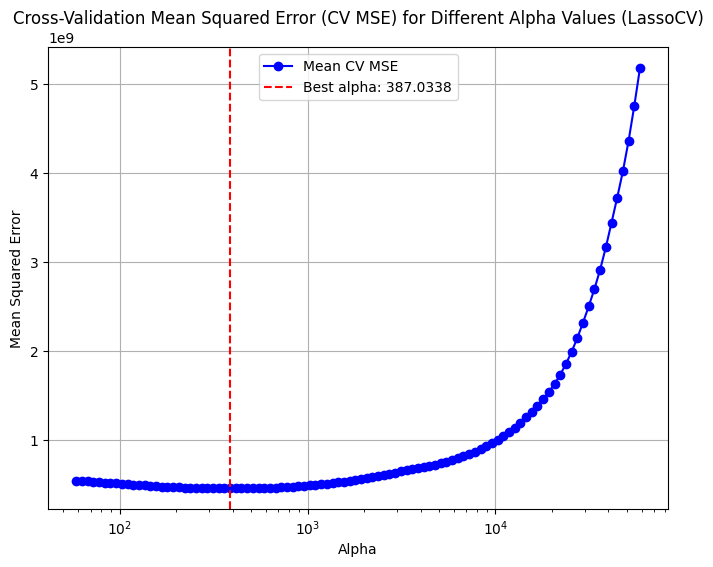

In [215]:
import matplotlib.pyplot as plt

# Plot the MSE for each alpha value tested during cross-validation
plt.figure(figsize=(8, 6))

# Plot the MSE path (across alphas)
plt.plot(lasso_cv.alphas_, lasso_cv.mse_path_.mean(axis=1), linestyle='-', marker='o', color='b', label='Mean CV MSE')

# Mark the best alpha
plt.axvline(x=lasso_cv.alpha_, color='r', linestyle='--', label=f'Best alpha: {lasso_cv.alpha_:.4f}')
plt.xscale('log')

# Labels and title
plt.xlabel('Alpha')
plt.ylabel('Mean Squared Error')
plt.title('Cross-Validation Mean Squared Error (CV MSE) for Different Alpha Values (LassoCV)')
plt.legend()
plt.grid(True)

plt.show()

We want to display the most important predictors.

In [216]:
# Extract feature names if using a DataFrame
feature_names = X_train_encoded.columns if isinstance(X_train_encoded, pd.DataFrame) else np.arange(X_train_encoded.shape[1])

coefficients = lasso_cv.coef_
coeff_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
coeff_df['Abs_Coefficient'] = coeff_df['Coefficient'].abs()
coeff_df_sorted = coeff_df.sort_values(by='Abs_Coefficient', ascending=False)

# Display the 20 first most significant predictors
print("\nTop predictors by magnitude:")
print(coeff_df_sorted.head(20))


Top predictors by magnitude:
                  Feature   Coefficient  Abs_Coefficient
15            Gr Liv Area  24515.362453     24515.362453
3            Overall Qual  12477.051484     12477.051484
11          Total Bsmt SF  12463.617386     12463.617386
5              Year Built   7274.399410      7274.399410
75   Neighborhood_NridgHt   6229.555487      6229.555487
10            Bsmt Unf SF  -6024.976160      6024.976160
4            Overall Cond   5606.605290      5606.605290
212       Kitchen Qual_TA  -5530.023794      5530.023794
24            Garage Cars   5071.802360      5071.802360
170          Bsmt Qual_Gd  -4945.948421      4945.948421
2                Lot Area   4818.943365      4818.943365
74   Neighborhood_NoRidge   4410.767922      4410.767922
367         Sale Type_New   4358.586774      4358.586774
173          Bsmt Qual_TA  -4220.713558      4220.713558
210       Kitchen Qual_Gd  -3948.646518      3948.646518
80   Neighborhood_Somerst   3634.626266      3634.626266
8

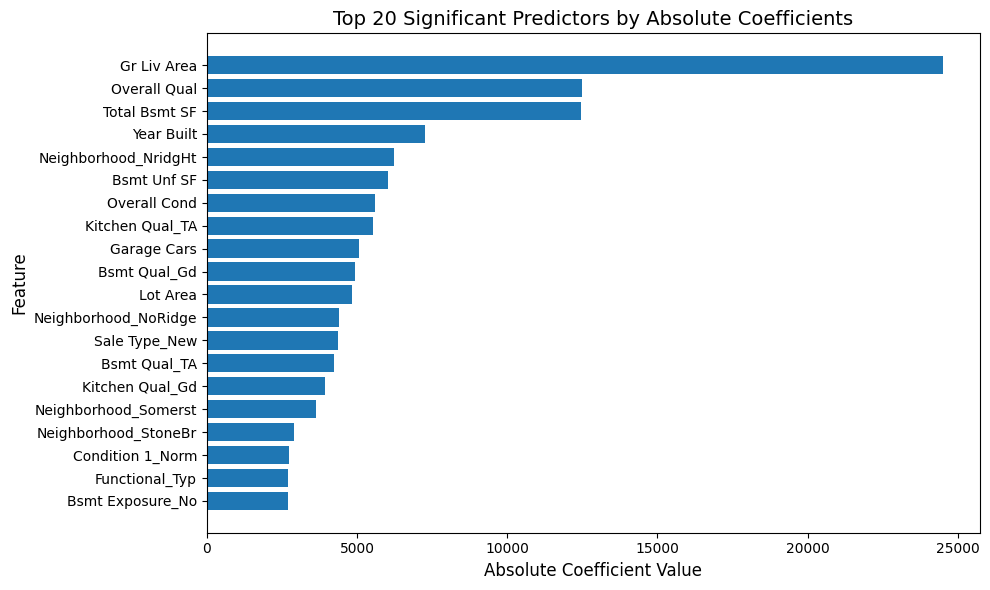

In [217]:
#Ploting the results
# Sort by absolute coefficients for significance
top_features = coeff_df_sorted.head(20)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(top_features['Feature'], top_features['Abs_Coefficient'])
plt.xlabel('Absolute Coefficient Value', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.title('Top 20 Significant Predictors by Absolute Coefficients', fontsize=14)
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.tight_layout()
plt.show()

We then analyze the residuals.

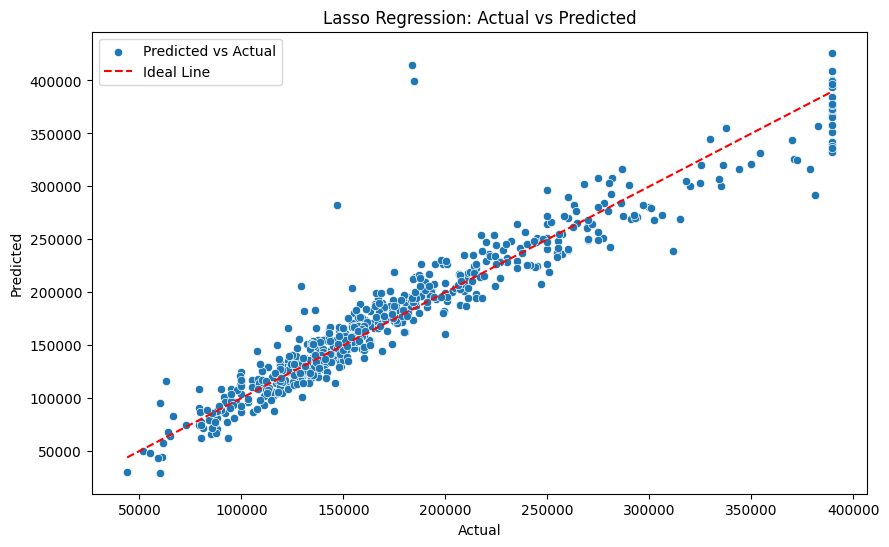

In [218]:
# Plot actual vs predicted values using Seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test_encoded, y=y_pred_lasso_cv, label='Predicted vs Actual')

# Plot the red line for the ideal case where actual = predicted
plt.plot([y_test_encoded.min(), y_test_encoded.max()], [y_test_encoded.min(), y_test_encoded.max()], color='red', linestyle='--', label='Ideal Line')

# Add labels and title
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Lasso Regression: Actual vs Predicted')

# Show legend
plt.legend()

# Display the plot
plt.show()

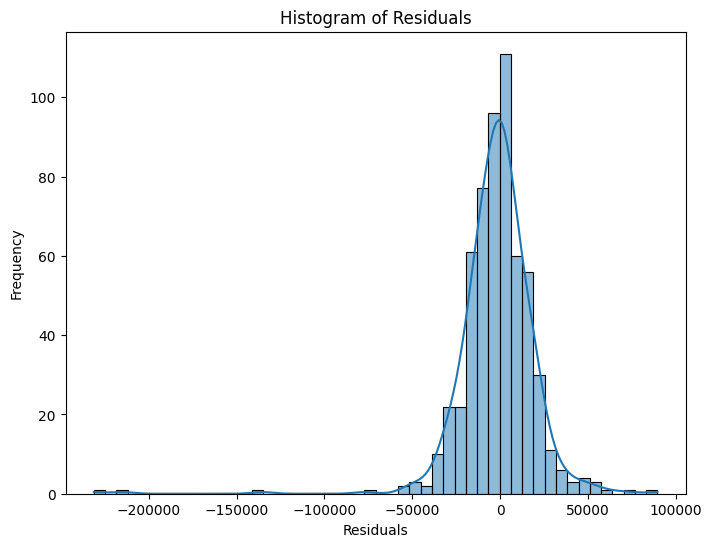

In [219]:
# Calculate residuals (difference between actual and predicted values)
residuals = y_test_encoded - y_pred_lasso_cv

# 1. Plot a histogram of the residuals
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, bins=50)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

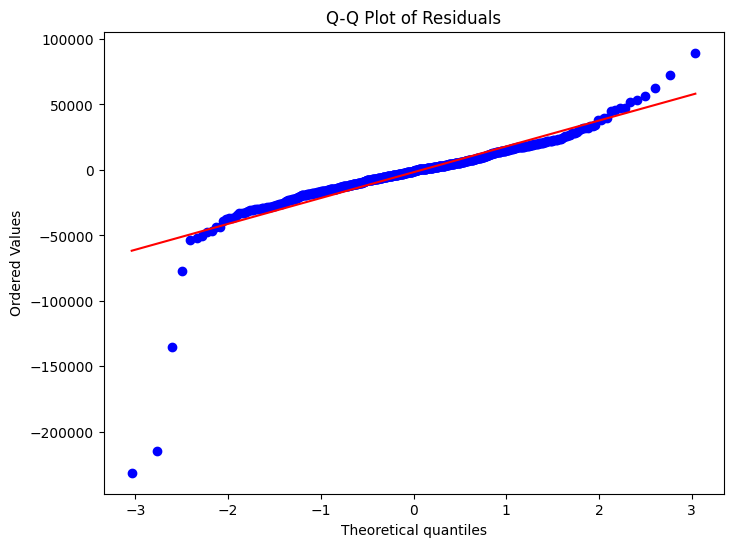

In [220]:
# 2. Q-Q plot
plt.figure(figsize=(8, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals")
plt.show()

# 6. Machine Learning Approach

## 6.1 Random Forest

Random Forest is an ensemble learning method that combines multiple decision trees to improve predictive accuracy and control overfitting. To optimize the parameters of the model we will use in a first a cross validation and then a grid search.

In [197]:
# Initialize the RandomForestRegressor
rf = RandomForestRegressor(random_state=42)

# Cross-validation to evaluate the model performance
cv_scores = cross_val_score(rf, X_train_encoded, y_train_encoded, cv=5, scoring='neg_mean_squared_error')

# Fit the model on the training data
rf.fit(X_train_encoded, y_train_encoded)

# Make predictions on the test set
pred_test_rf = rf.predict(X_test_encoded)

# Calculate the performance metrics
mae = mean_absolute_error(y_test_encoded, pred_test_rf)
rmse = np.sqrt(mean_squared_error(y_test_encoded, pred_test_rf))
r2 = r2_score(y_test_encoded, pred_test_rf)
r2_adj = 1 - (1-r2)*(len(y_test_encoded)-1)/(len(y_test_encoded)- X_test_encoded.shape[1]-1)
percentage_error = np.mean(abs(pred_test_rf - y_test_encoded) / abs(y_test_encoded) * 100)

# Print the results
print('Cross-validation Mean Squared Error (MSE):', -cv_scores.mean())  # Display average CV score
print('MAE of the model :', mae)
print('RMSE of the model :', rmse)
print(f'R²: {r2}')
print(f'Adjusted R²:{r2_adj}')
print('Percentage of error :', f"{percentage_error:.2f} %")

Cross-validation Mean Squared Error (MSE): 519518252.95609665
MAE of the model : 14444.692218430035
RMSE of the model : 23236.826237115878
R²: 0.9026691520324831
Percentage of error : 8.82 %


Now we tune the model using a grid search strategy.


In [199]:
parameters = {
    'n_estimators': [100, 500],  
    'max_depth': [10, 20],        
    'min_samples_leaf': [2, 5],   
    'bootstrap': [True]           
}

tuned_rf = GridSearchCV(rf, parameters, cv=5) 
tuned_rf.fit(X_train_encoded, y_train_encoded)


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid={'bootstrap': [True], 'max_depth': [10, 20],
                         'min_samples_leaf': [2, 5],
                         'n_estimators': [100, 500]})

In [88]:
rf_tuned = RandomForestRegressor(max_depth=20, 
                           min_samples_leaf=2, 
                           n_estimators=500, 
                           random_state=42)

rf_tuned.fit(X_train_encoded, y_train_encoded)

RandomForestRegressor(max_depth=20, min_samples_leaf=2, n_estimators=500,
                      random_state=42)

In [89]:
# Predict using the trained model
pred_test_rf_tuned = rf_tuned.predict(X_test_encoded)

print('MAE of the model :', mean_absolute_error(y_test_encoded, pred_test_rf_tuned))
print('RMSE of the model :', np.sqrt(mean_squared_error(y_test_encoded, pred_test_rf_tuned)))
print(f'R²: {r2_score(y_test_encoded, pred_test_rf_tuned)}')
print(f'Adjusted R²:{1 - (1- r2_score(y_test_encoded, pred_test_rf_tuned))*(len(y_test_encoded)-1)/(len(y_test_encoded)- X_test_encoded.shape[1]-1)}')
print('Percentage of error :', f"{np.mean(abs(pred_test_rf_tuned - y_test_encoded)/abs(y_test_encoded)*100):.2f}", '%')

MAE of the model : 14618.93765265939
RMSE of the model : 23854.13279041754
R²: 0.9001742596302909
Percentage of error : 9.05 %


We display the most important features of the model.

C:\Users\coral\AppData\Local\Temp\ipykernel_26700\1845430123.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=top_20_features, palette='viridis')


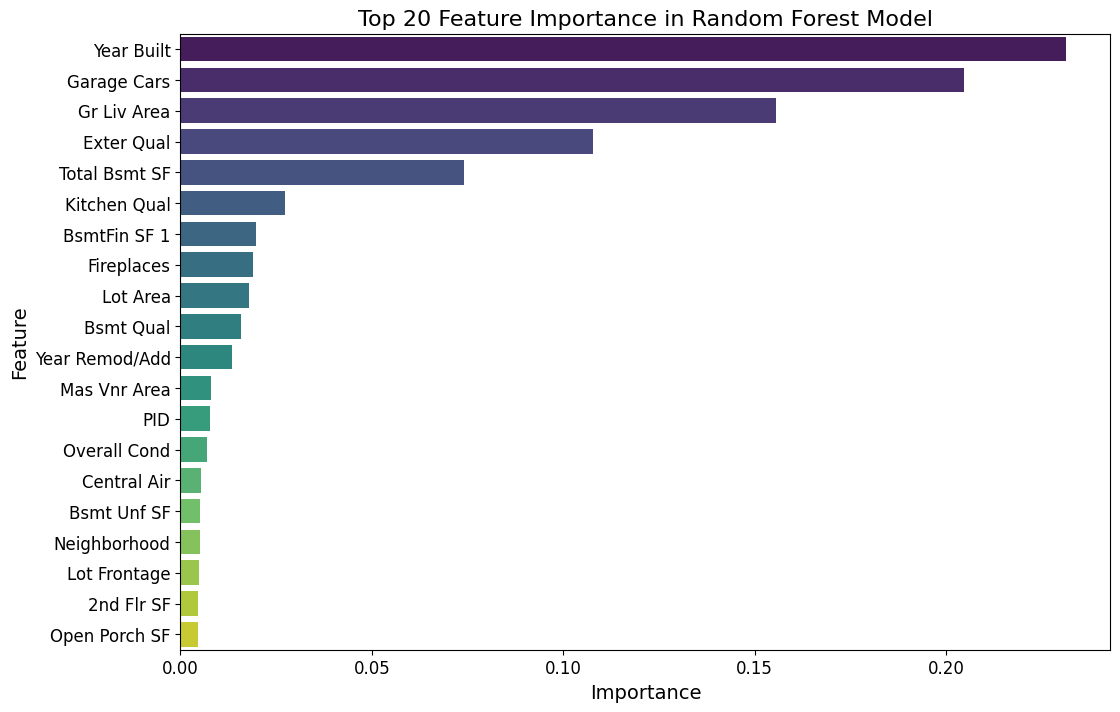

In [90]:
# Get feature importances from the RandomForest model
importances = rf_tuned.feature_importances_

# Create a DataFrame for easy plotting
feature_importance_df = pd.DataFrame({
    'Feature': X_train_encoded.columns,
    'Importance': importances
})

# Sort the features by importance in descending order and select the top 20
top_20_features = feature_importance_df.sort_values(by='Importance', ascending=False).head(20)

# Plot the top 20 feature importances
plt.figure(figsize=(12, 8))  # Increase figure size for better readability
sns.barplot(x='Importance', y='Feature', data=top_20_features, palette='viridis')

# Customize the plot for better clarity
plt.title('Top 20 Feature Importance in Random Forest Model', fontsize=16)
plt.xlabel('Importance', fontsize=14)
plt.ylabel('Feature', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

Residual analysis:

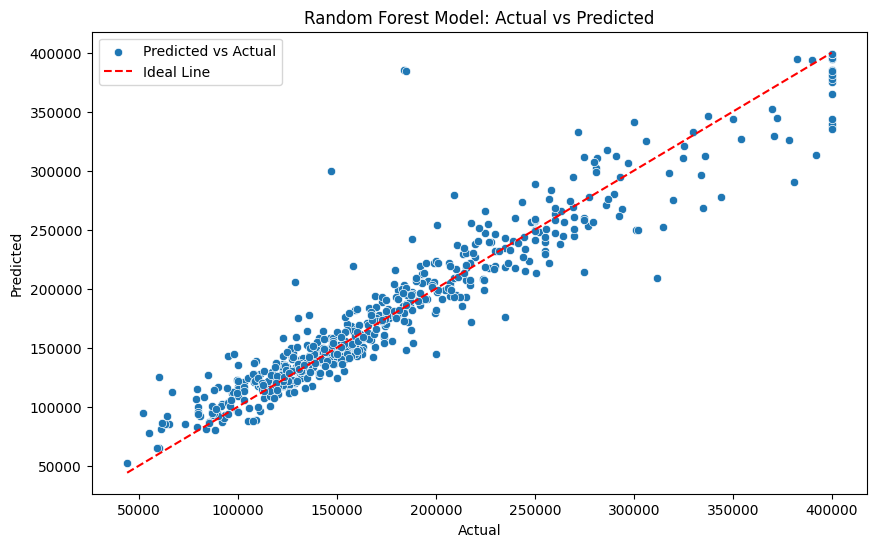

In [91]:
# Plot actual vs predicted values using Seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test_encoded, y=pred_test_rf_tuned, label='Predicted vs Actual')

# Plot the red line for the ideal case where actual = predicted
plt.plot([y_test_encoded.min(), y_test_encoded.max()], [y_test_encoded.min(), y_test_encoded.max()], color='red', linestyle='--', label='Ideal Line')

# Add labels and title
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Random Forest Model: Actual vs Predicted')

# Show legend
plt.legend()

# Display the plot
plt.show()

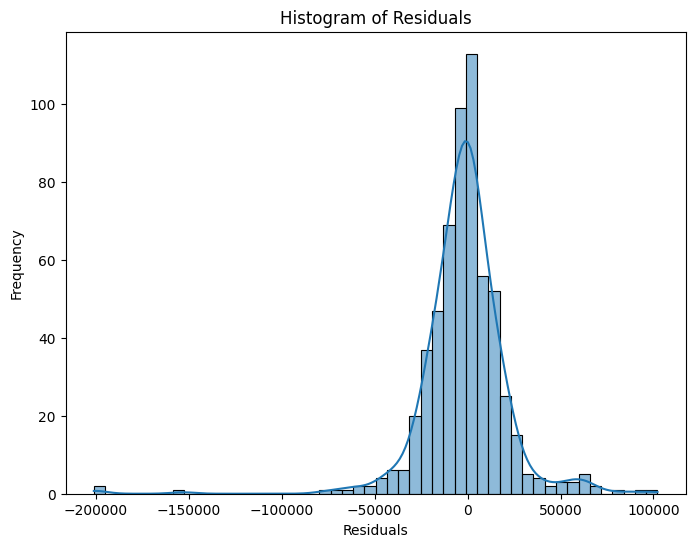

In [92]:
# Calculate residuals (difference between actual and predicted values)
residuals = y_test_encoded - pred_test_rf_tuned

# 1. Plot a histogram of the residuals
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, bins=50)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

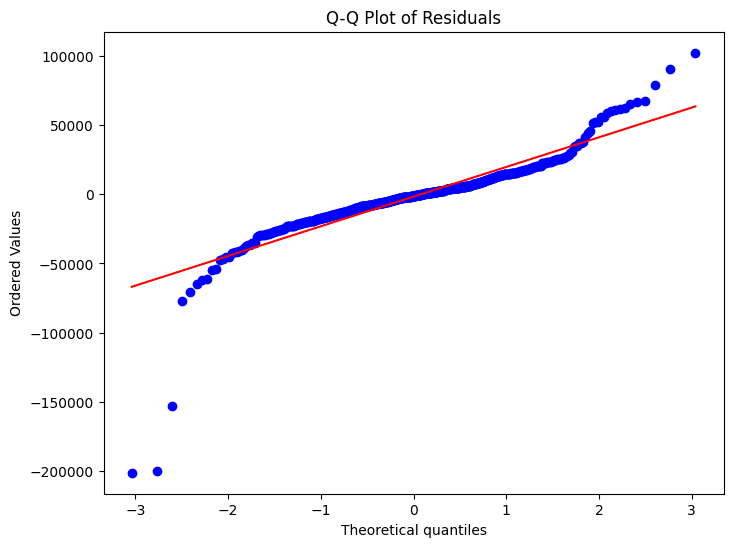

In [93]:
# 2. Q-Q plot
plt.figure(figsize=(8, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals")
plt.show()

## 6.2 Gradient Boosting

In [241]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize the GradientBoostingRegressor
gb = GradientBoostingRegressor(random_state=42)

# Cross-validation to evaluate the model performance
cv_scores = cross_val_score(gb, X_train_scaled_encoded, y_train_encoded, cv=5, scoring='neg_mean_squared_error')

# Fit the model on the training data
gb.fit(X_train_scaled_encoded, y_train_encoded)

# Make predictions on the test set
pred_test_gb = gb.predict(X_test_scaled_encoded)

# Calculate the performance metrics
mae = mean_absolute_error(y_test_encoded, pred_test_gb)
rmse = np.sqrt(mean_squared_error(y_test_encoded, pred_test_gb))
r2 = r2_score(y_test_encoded, pred_test_gb)
r2_adj = 1 - (1-r2)*(len(y_test_encoded)-1)/(len(y_test_encoded)- X_test_encoded.shape[1]-1)
percentage_error = np.mean(abs(pred_test_gb - y_test_encoded) / abs(y_test_encoded) * 100)

# Print the results
print('Cross-validation Mean Squared Error (MSE):', -cv_scores.mean())  # Display average CV score
print('MAE of the model :', mae)
print('RMSE of the model :', rmse)
print(f'R²: {r2}')
print(f'Adjusted R² : {r2_adj}')
print('Percentage of error :', f"{percentage_error:.2f} %")


Cross-validation Mean Squared Error (MSE): 447887231.01109755
MAE of the model : 13537.924282740687
RMSE of the model : 21827.445471230298
R²: 0.9141178891496222
Adjusted R² : 0.7596122734570765
Percentage of error : 8.22 %


In [242]:
# Define the hyperparameters for tuning the GradientBoostingRegressor
parameters = {
    'n_estimators': [100, 300], 
    'max_depth': [3, 5],  
    'learning_rate': [0.01, 0.1],  
    'subsample': [0.8], 
}

# Initialize the GradientBoostingRegressor
gb = GradientBoostingRegressor(random_state=42)

# Initialize GridSearchCV with GradientBoostingRegressor and the parameters
tuned_gb = GridSearchCV(gb, parameters, cv=5)

# Fit the model on the training data
tuned_gb.fit(X_train_scaled_encoded, y_train_encoded)

# Best parameters found by GridSearchCV
print("Best parameters:", tuned_gb.best_params_)

Best parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300, 'subsample': 0.8}


In [252]:
tuned_gb = GradientBoostingRegressor(
    learning_rate=0.1,       # Learning rate (shrinkage factor)
    max_depth=5,             # Maximum depth of individual trees
    n_estimators=300,        
    subsample=0.8,           # Fraction of samples used for fitting each tree
    random_state=42          # Random seed for reproducibility
)

# Fit the model on the training data
tuned_gb.fit(X_train_scaled_encoded, y_train_encoded)

# Make predictions on the test set using the best model
pred_test_gb_tuned = tuned_gb.predict(X_test_scaled_encoded)

# Calculate the performance metrics
mae = mean_absolute_error(y_test_encoded, pred_test_gb_tuned)
rmse = np.sqrt(mean_squared_error(y_test_encoded, pred_test_gb_tuned))
r2 = r2_score(y_test_encoded, pred_test_gb_tuned)
r2_adj = 1 - (1-r2)*(len(y_test_encoded)-1)/(len(y_test_encoded)- X_test_scaled_encoded.shape[1]-1)
percentage_error = np.mean(abs(pred_test_gb_tuned - y_test_encoded) / abs(y_test_encoded) * 100)

# Print the results
print('MAE of the model:', mae)
print('RMSE of the model:', rmse)
print(f'R²: {r2}')
print(f'Adjusted R²: {r2_adj}')
print('Percentage of error:', f"{percentage_error:.2f} %")

MAE of the model: 12900.937822992139
RMSE of the model: 21235.544227813047
R²: 0.9187125167439653
Adjusted R²: 0.7724728339484195
Percentage of error: 7.76 %


Most Important features:

C:\Users\emmab\AppData\Local\Temp\ipykernel_12664\2048913219.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=top_20_features, palette='viridis')


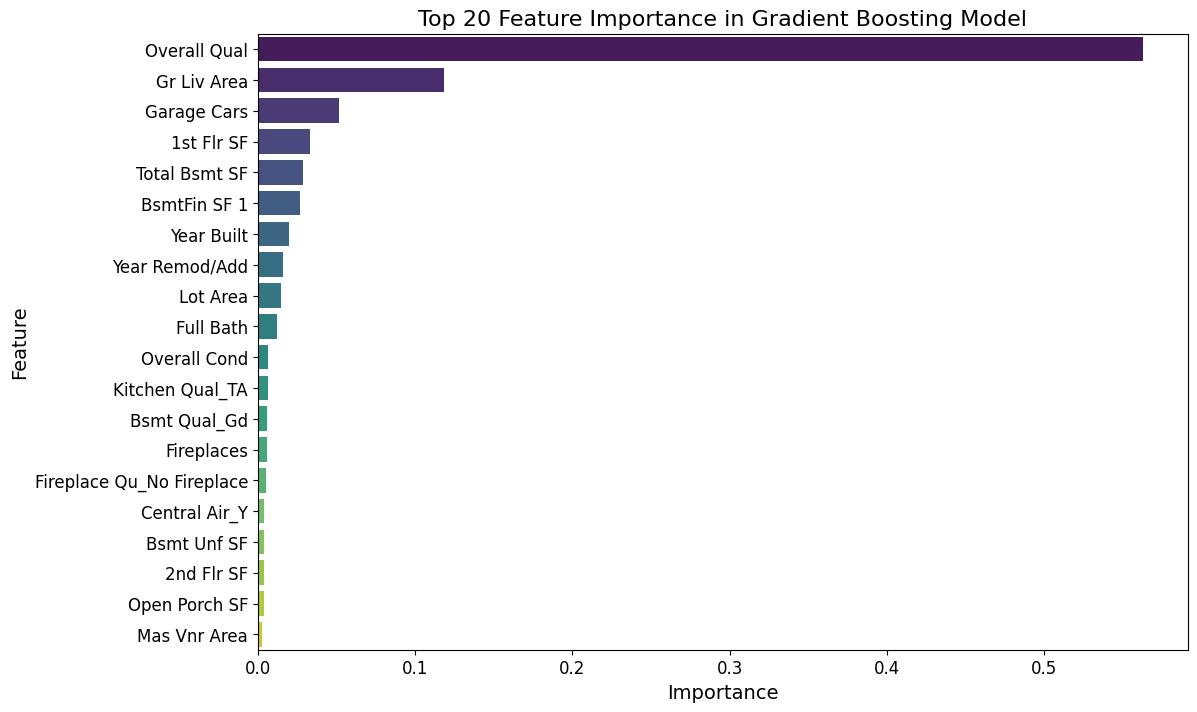

In [246]:
# Get feature importances from the RandomForest model
importances = tuned_gb.feature_importances_

# Create a DataFrame for easy plotting
feature_importance_df = pd.DataFrame({
    'Feature': X_train_encoded.columns,
    'Importance': importances
})

# Sort the features by importance in descending order and select the top 20
top_20_features = feature_importance_df.sort_values(by='Importance', ascending=False).head(20)

# Plot the top 20 feature importances
plt.figure(figsize=(12, 8))  # Increase figure size for better readability
sns.barplot(x='Importance', y='Feature', data=top_20_features, palette='viridis')

# Customize the plot for better clarity
plt.title('Top 20 Feature Importance in Gradient Boosting Model', fontsize=16)
plt.xlabel('Importance', fontsize=14)
plt.ylabel('Feature', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

Residual Analysis

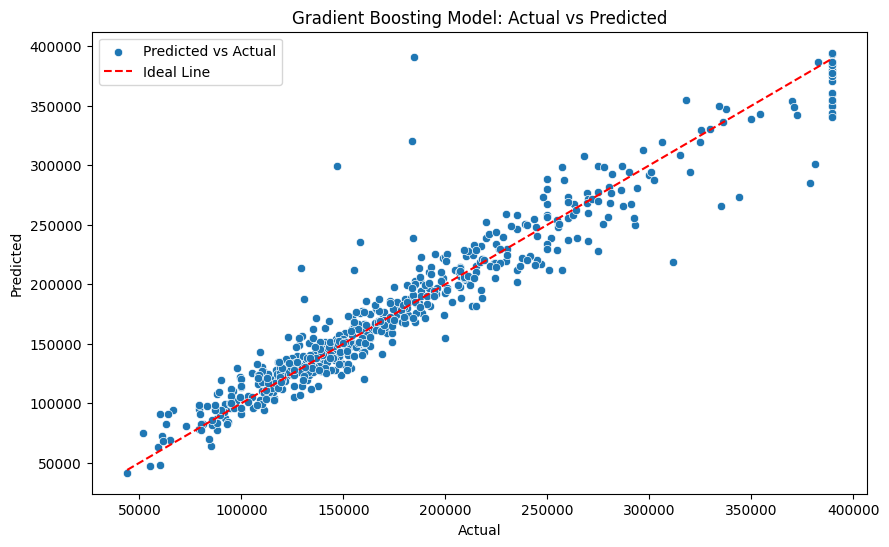

In [247]:
# Plot actual vs predicted values using Seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test_encoded, y=pred_test_gb_tuned, label='Predicted vs Actual')

# Plot the red line for the ideal case where actual = predicted
plt.plot([y_test_encoded.min(), y_test_encoded.max()], [y_test_encoded.min(), y_test_encoded.max()], color='red', linestyle='--', label='Ideal Line')

# Add labels and title
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Gradient Boosting Model: Actual vs Predicted')

# Show legend
plt.legend()

# Display the plot
plt.show()

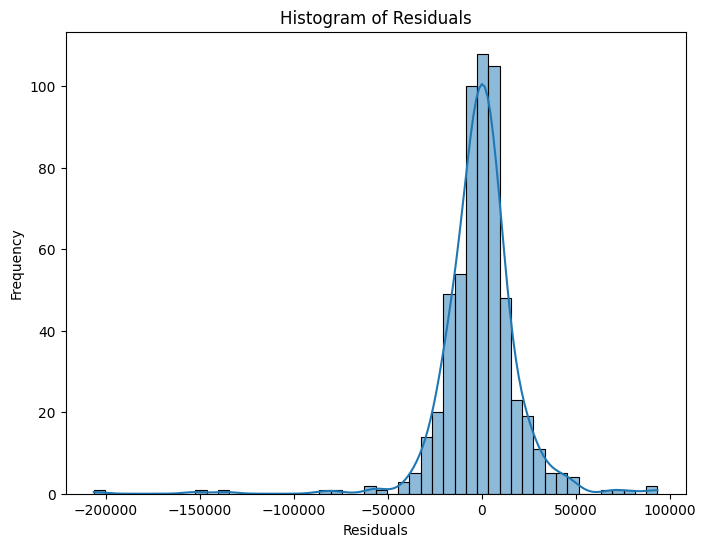

In [249]:
# Calculate residuals (difference between actual and predicted values)
residuals = y_test_encoded - pred_test_gb_tuned

# 1. Plot a histogram of the residuals
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, bins=50)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

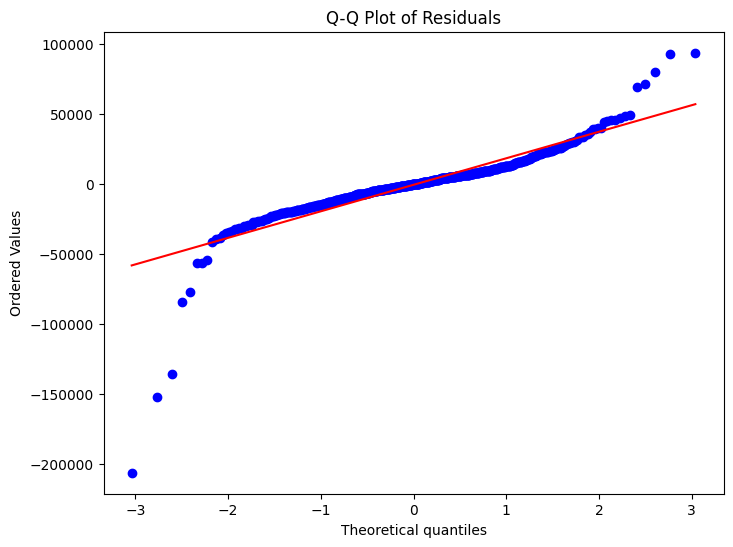

In [250]:
# 2. Q-Q plot
plt.figure(figsize=(8, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals")
plt.show()

## 6.3 SVR

In [51]:
model = svm.SVR(kernel='linear',
                gamma='scale',
                C=1.0,
                epsilon=0.1)
model = model.fit(X_train_scaled_encoded, y_train_encoded)

In [52]:
Y_pred_SVR = model.predict(X_test_scaled_encoded)

# Calculate the performance metrics
mae = mean_absolute_error(y_test_encoded, Y_pred_SVR)
rmse = np.sqrt(mean_squared_error(y_test_encoded, Y_pred_SVR))
r2 = r2_score(y_test_encoded, Y_pred_SVR)
r2_adj = 1 - (1-r2)*(len(y_test_encoded)-1)/(len(y_test_encoded)- X_test_scaled_encoded.shape[1]-1)
percentage_error = np.mean(abs(Y_pred_SVR - y_test_encoded) / abs(y_test_encoded) * 100)

# Print the results
print('MAE of the model:', mae)
print('RMSE of the model:', rmse)
print(f'R²: {r2}')
print(f'Adjusted R²: {r2_adj}')
print('Percentage of error:', f"{percentage_error:.2f} %")

MAE of the model: 35750.83000843924
RMSE of the model: 54975.426109468695
R²: 0.45520376856665623
Adjusted R²: -0.5249081119067276
Percentage of error: 19.64 %


In [39]:
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.1, 0.01],
    'epsilon': [0.1, 0.2, 0.5]
}

grid_search = GridSearchCV(SVR(kernel='linear'), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled_encoded, y_train_encoded)
best_model = grid_search.best_estimator_

print("Best parameters:", grid_search.best_params_)


Best parameters: {'C': 100, 'epsilon': 0.5, 'gamma': 'scale'}


In [53]:
model_SVR = svm.SVR(kernel='linear',
                gamma='scale',
                C=100,
                epsilon=0.5)
model_SVR = model_SVR.fit(X_train_scaled_encoded, y_train_encoded)

In [54]:
Y_pred_SVR = model_SVR.predict(X_test_scaled_encoded)

# Calculate the performance metrics
mae = mean_absolute_error(y_test_encoded, Y_pred_SVR)
rmse = np.sqrt(mean_squared_error(y_test_encoded, Y_pred_SVR))
r2 = r2_score(y_test_encoded, Y_pred_SVR)
r2_adj = 1 - (1-r2)*(len(y_test_encoded)-1)/(len(y_test_encoded)- X_test_scaled_encoded.shape[1]-1)
percentage_error = np.mean(abs(Y_pred_SVR - y_test_encoded) / abs(y_test_encoded) * 100)

# Print the results
print('MAE of the model:', mae)
print('RMSE of the model:', rmse)
print(f'R²: {r2}')
print(f'Adjusted R²: {r2_adj}')
print('Percentage of error:', f"{percentage_error:.2f} %")

MAE of the model: 13941.145275716442
RMSE of the model: 23885.42332514762
R²: 0.8971598333341062
Adjusted R²: 0.7121459449782399
Percentage of error: 8.30 %


C:\Users\coral\AppData\Local\Temp\ipykernel_27444\44247548.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=top_features, palette='viridis')


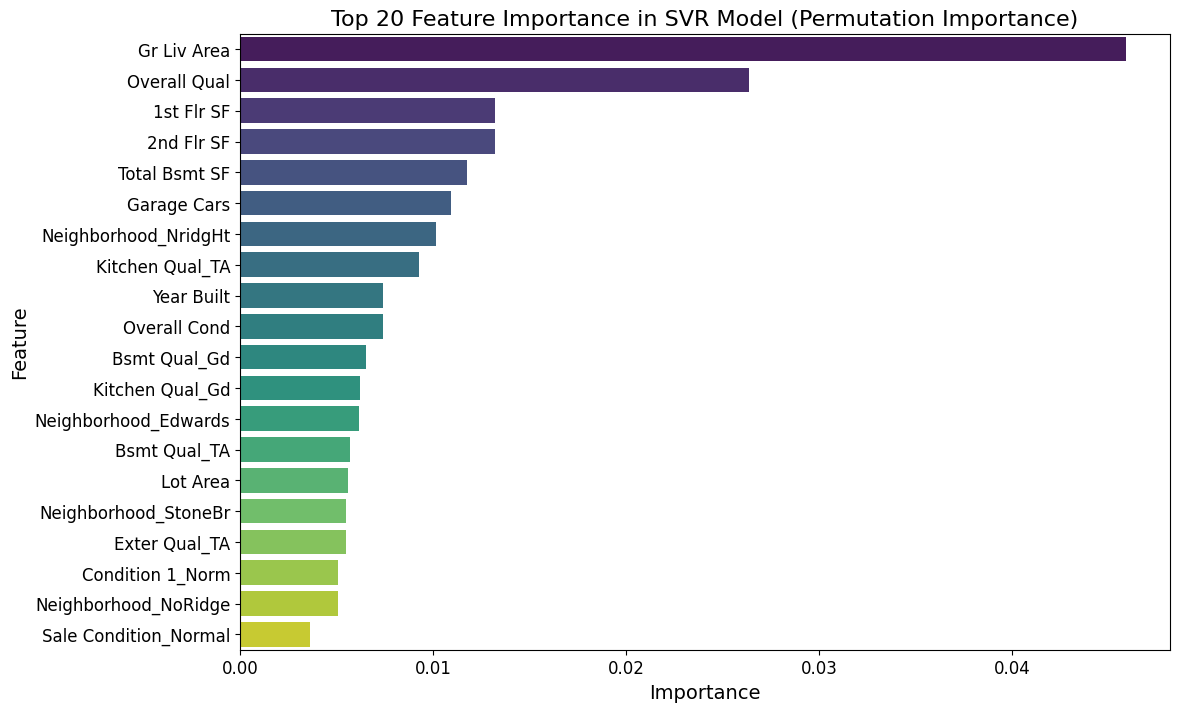

In [ ]:
result = permutation_importance(model_SVR, X_test_scaled_encoded, y_test_encoded, n_repeats=10, random_state=42)

feature_importance_df = pd.DataFrame({
    'Feature': X_encoded.columns,  # Using real column names from the dataset
    'Importance': result.importances_mean
})

# Sort the features by importance in descending order and select the top 20
top_features = feature_importance_df.sort_values(by='Importance', ascending=False).head(20)

# Plot the top feature importances
plt.figure(figsize=(12, 8))  # Set figure size for readability
sns.barplot(x='Importance', y='Feature', data=top_features, palette='viridis')

# Customize the plot
plt.title('Top 20 Feature Importance in SVR Model (Permutation Importance)', fontsize=16)
plt.xlabel('Importance', fontsize=14)
plt.ylabel('Feature', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.show()


Residual analysis:

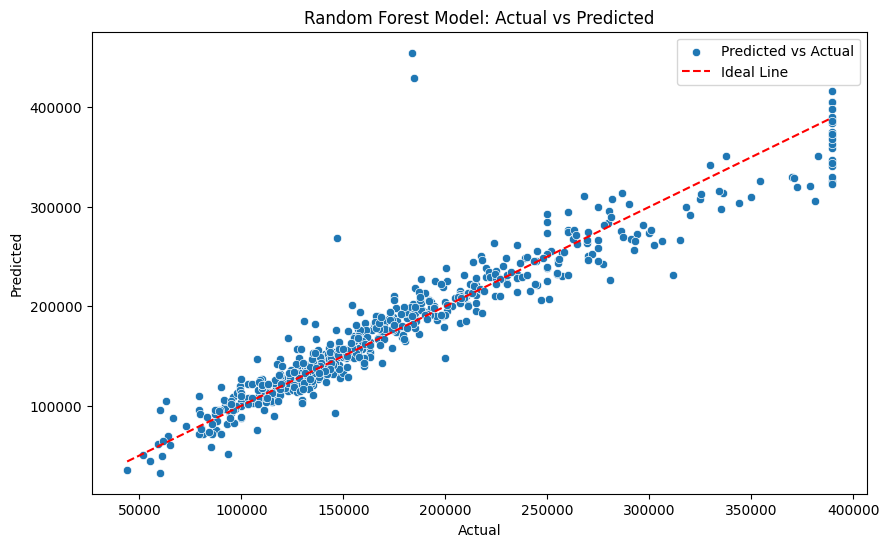

In [70]:
# Plot actual vs predicted values using Seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test_encoded, y=Y_pred_SVR, label='Predicted vs Actual')

# Plot the red line for the ideal case where actual = predicted
plt.plot([y_test_encoded.min(), y_test_encoded.max()], [y_test_encoded.min(), y_test_encoded.max()], color='red', linestyle='--', label='Ideal Line')

# Add labels and title
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Random Forest Model: Actual vs Predicted')

# Show legend
plt.legend()

# Display the plot
plt.show()

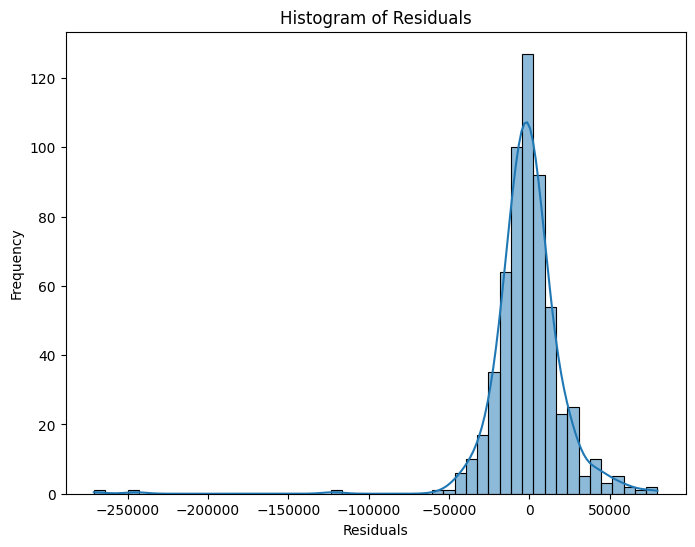

In [71]:
# Calculate residuals (difference between actual and predicted values)
residuals = y_test_encoded - Y_pred_SVR

# 1. Plot a histogram of the residuals
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, bins=50)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

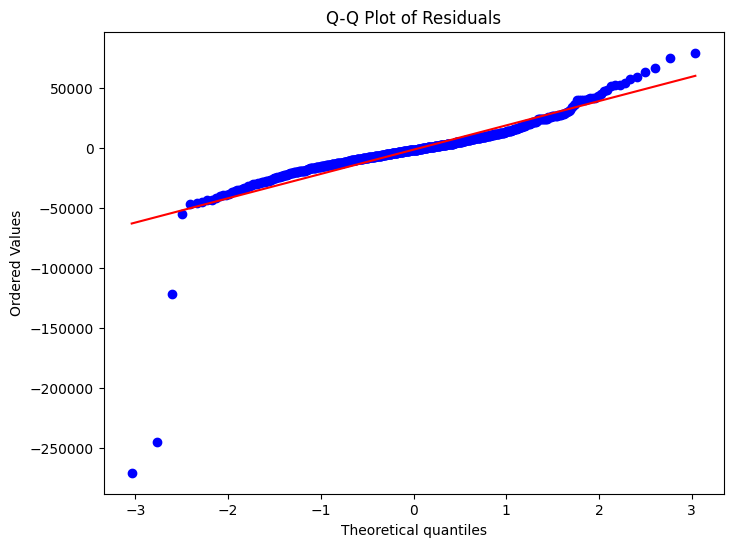

In [72]:
# 2. Q-Q plot
plt.figure(figsize=(8, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals")
plt.show()

# 7. Monte Carlo Cross Validation

In [74]:
import time

np.random.seed(42) 
tps0 = time.perf_counter()

housing_encoded = pd.get_dummies(housing, drop_first=True)  
X_encoded = housing_encoded.drop('SalePrice', axis=1) 
y_encoded = housing_encoded['SalePrice'] 

n_splits = 10
test_size = 0.2 
models = {
    "LinearRegression": LinearRegression(),
    "LassoCV": LassoCV(cv=5),
    "RandomForestRegressor": RandomForestRegressor(max_depth=20, min_samples_leaf=2, n_estimators=500, random_state=42),
    "GradientBoostingRegressor": GradientBoostingRegressor(
        learning_rate=0.1, max_depth=5, n_estimators=300, subsample=0.8, random_state=42),
    "SVR": SVR(kernel='linear', gamma='scale', C=100, epsilon=0.5)
}

results = {name: {"MAE": [], "RMSE": [], "R²": [], "Adjusted R²": []} for name in models.keys()}

# Monte Carlo Cross Validation
for split in range(n_splits):
    print(f"Split Monte Carlo {split + 1}/{n_splits}...")
    
    X_train_encoded, X_test_encoded, y_train_encoded, y_test_encoded = train_test_split(
        X_encoded, y_encoded, test_size=test_size, random_state=split)
    
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train_encoded)
    X_test_scaled = scaler.transform(X_test_encoded)
    
    for name, model in models.items():
        
        if name in ["LassoCV", "GradientBoostingRegressor", "SVR"]:
            X_train, X_test = X_train_scaled, X_test_scaled
        else:
            X_train, X_test = X_train_encoded, X_test_encoded
        
        #Training
        model.fit(X_train, y_train_encoded)
        
        #Testing
        y_pred = model.predict(X_test)
        
        mae = mean_absolute_error(y_test_encoded, y_pred)
        rmse = np.sqrt(mean_squared_error(y_test_encoded, y_pred))
        r2 = r2_score(y_test_encoded, y_pred)
        r2_adj = 1 - (1-r2)*(len(y_test_encoded)-1)/(len(y_test_encoded)- X_test_encoded.shape[1]-1)
        
        # Stockage des résultats
        results[name]["MAE"].append(mae)
        results[name]["RMSE"].append(rmse)
        results[name]["R²"].append(r2)
        results[name]["Adjusted R²"].append(r2_adj)

# Mean computation for each metric
final_results = {}
for name, metrics in results.items():
    final_results[name] = {
        "MAE_mean": np.mean(metrics["MAE"]),
        "RMSE_mean": np.mean(metrics["RMSE"]),
        "R²_mean": np.mean(metrics["R²"]),
        "Adjusted_R²_mean": np.mean(metrics["Adjusted R²"])
    }

# Print the results
print("\nFinal Results with Monte Carlo Cross Validation :")
for name, metrics in final_results.items():
    print(f"\nModel : {name}")
    for metric_name, value in metrics.items():
        print(f"{metric_name}: {value:.4f}")

# Get the execution time 
tps1 = time.perf_counter()
print("\nExecution Time : %.2f" % ((tps1 - tps0) / 60))


Split Monte Carlo 1/10...
Split Monte Carlo 2/10...
Split Monte Carlo 3/10...
Split Monte Carlo 4/10...
Split Monte Carlo 5/10...
Split Monte Carlo 6/10...
Split Monte Carlo 7/10...
Split Monte Carlo 8/10...
Split Monte Carlo 9/10...
Split Monte Carlo 10/10...

Final Results with Monte Carlo Cross Validation :

Model : LinearRegression
MAE_mean: 15166.4352
RMSE_mean: 22973.3357
R²_mean: 0.8991
Adjusted_R²_mean: 0.7175

Model : LassoCV
MAE_mean: 14182.7422
RMSE_mean: 21282.3917
R²_mean: 0.9129
Adjusted_R²_mean: 0.7561

Model : RandomForestRegressor
MAE_mean: 14708.6312
RMSE_mean: 22597.0659
R²_mean: 0.9021
Adjusted_R²_mean: 0.7261

Model : GradientBoostingRegressor
MAE_mean: 13112.0971
RMSE_mean: 20060.4072
R²_mean: 0.9230
Adjusted_R²_mean: 0.7844

Model : SVR
MAE_mean: 14324.6474
RMSE_mean: 21901.2986
R²_mean: 0.9077
Adjusted_R²_mean: 0.7418

Execution Time : 14.17
